In [1]:
!which python
import sys

print(sys.version)


/Users/jagpreetsingh/Documents/AML_2304_NLP/assignment2/US_environment_cases/venv/bin/python
3.10.9 (main, Mar  1 2023, 12:20:14) [Clang 14.0.6 ]


In [79]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import wordnet
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import sent_tokenize,word_tokenize

from nltk.corpus import stopwords

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
import matplotlib.cm as cm
from wordcloud import WordCloud

from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sentence_transformers import SentenceTransformer, util
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.max_colwidth',100)



In [3]:
DOWNLOAD_PACKAGE = False
stop_words = set(stopwords.words('english'))


In [4]:

if DOWNLOAD_PACKAGE:
    nltk.download('wordnet')
    nltk.download('punkt')
    nltk.download('stopwords')
    nltk.download('punkt') 
    nltk.download('stopwords')

In [5]:
df = pd.read_json('final_cases_corrected.json')

In [6]:
df.head()

respondent  \
0                      2023 Tesoro Martinez Clean Air Act Settlement Information Sheet   
1  Sanitary District of Highland, Indiana Clean Water Act Settlement Information Sheet   
2               Town of Griffith, Indiana Clean Water Act Settlement Information Sheet   
3                              2023 MPLX LP Clean Air Act Settlement Information Sheet   
4         2023 The Williams Companies, Inc. Clean Air Act Settlement Information Sheet   

                                                                                           description  \
0   (Washington, DC – April 27, 2023) The U.S. Environmental Protection Agency (EPA) and the U.S. D...   
1   (Washington, DC – April 8, 2022) - The Sanitary District of Highland, Indiana, and the Town of ...   
2   (Washington, DC – April 8, 2022) - The Sanitary District of Highland, Indiana, and the Town of ...   
3   (Denver, CO – April 20, 2023) - The U.S. Environmental Protection Agency (EPA), U.S. Department...   
4   (Washington, DC – April 20, 2023) - The U.S. Environmental Protection Agency (EPA), the U.S. De...   

                                                                                                   url  \
0      https://www.epa.gov/enforcement/2023-tesoro-martinez-clean-air-act-settlement-information-sheet   
1  https://www.epa.gov/enforcement/sanitary-district-highland-indiana-clean-water-act-settlement-in...   
2   https://www.epa.gov/enforcement/town-griffith-indiana-clean-water-act-settlement-information-sheet   
3              https://www.epa.gov/enforcement/2023-mplx-lp-clean-air-act-settlement-information-sheet   
4  https://www.epa.gov/enforcement/2023-williams-companies-inc-clean-air-act-settlement-information...   

       order_type       date  \
0  Consent Decree 2023-04-27   
1                 2023-04-27   
2                 2023-04-27   
3  Consent Decree 2023-04-20   
4  Consent Decree 2023-04-20   

                                                                                              overview  \
0   Overview of Company Tesoro Refining & Marketing Company (Tesoro) is the owner and operator of t...   
1   Overview of Company Highland and the adjacent community of Griffith, Indiana, both do not own/o...   
2   Overview of Company Highland and the adjacent community of Griffith, Indiana, do not own/operat...   
3   Overview of Company MPLX LP is a master limited partnership formed by Marathon Petroleum Corpor...   
4   Overview of Company The Williams Companies, Inc. is a publicly traded company headquartered in ...   

                                                                                            violations  \
0   Violations EPA and the Justice Department allege that Tesoro violated a Clean Air Act requireme...   
1   Violations On December 9, 2002, the U.S. District Court for the Northern District of Indiana en...   
2   Violations On December 9, 2002, the U.S. District Court for the Northern District of Indiana en...   
3   Violations The United States, the State of North Dakota, and the State of Wyoming have filed a ...   
4   Violations The United States, the Southern Ute Indian Tribe, the States of Alabama, Colorado, W...   

                                                                                                relief  \
0   Injunctive Relief The settlement is a modification to the 2016 consent decree (Consent Decree M...   
1   Injunctive Relief Under the CD, Highland will increase its peak pumping flow capacity, by a fac...   
2   Injunctive Relief Under the CD, Highland will increase its peak pumping flow capacity, by a fac...   
3   Injunctive Relief MPLX has agreed to the following elements of injunctive relief for seven natu...   
4   Injunctive Relief Williams and Harvest have agreed to the following elements of injunctive reli...   

                                                                                               impacts  \
0                                                  

In [7]:
df.tail()

respondent  \
762                Renault Vehicules Industriels, s.a. Diesel Engines Settlement   
763  Volvo Truck Corporation (Order and Consent Decree) Diesel Engine Settlement   
764                             FMC Corporation, Inc. Hazardous Waste Settlement   
765                                                    American Honda Settlement   
766                                                Ford Motor Company Settlement   

                                                                                             description  \
762  On October 22, 1998, the Department of Justice and the Environmental Protection Agency announced...   
763  On October 22, 1998, the Department of Justice and the Environmental Protection Agency announced...   
764  On October 16, 1998, settlement was reached with FMC Corporation, Inc. for numerous RCRA hazardo...   
765  American Honda Motor Co., Inc. ("Honda") will spend $267 million to settle allegations that it v...   
766  EPA filed a settlement with Ford Motor Company, in the U.S.District Court for the District of Co...   

                                                                                            url  \
762  https://www.epa.gov/enforcement/renault-vehicules-industriels-sa-diesel-engines-settlement   
763           https://www.epa.gov/enforcement/volvo-truck-corporation-diesel-engines-settlement   
764              https://www.epa.gov/enforcement/fmc-corporation-inc-hazardous-waste-settlement   
765       https://www.epa.gov/enforcement/american-honda-motor-company-clean-air-act-settlement   
766                 https://www.epa.gov/enforcement/ford-motor-company-clean-air-act-settlement   

         order_type       date overview violations relief impacts benefits  \
762  Consent Decree 1998-10-22      NaN        NaN    NaN     NaN      NaN   
763  Consent Decree 1998-10-22      NaN        NaN    NaN     NaN      NaN   
764  Consent Decree 1998-10-16      NaN        NaN    NaN     NaN      NaN   
765  Consent Decree 1998-06-08      NaN        NaN    NaN     NaN      NaN   
766  Consent Decree 1998-06-04      NaN        NaN    NaN     NaN      NaN   

     ... mercury refining, inc. superfund site companies agreement  \
762  ...                                   NaN       NaN       NaN   
763  ...                                   NaN       NaN       NaN   
764  ...                                   NaN       NaN       NaN   
765  ...                                   NaN       NaN       NaN   
766  ...                                   NaN       NaN       NaN   

    on this page: violation tsca/rcra settlement  \
762           NaN       NaN                  NaN   
763           NaN       NaN                  NaN   
764           NaN       NaN                  NaN   
765           NaN       NaN                  NaN   
766           NaN       NaN                  NaN   

    tsca/rcra settlement supplemental environmental projects (seps)  \
762                                                             NaN   
763                                                             NaN   
764                                                             NaN   
765                                                             NaN   
766                                                             NaN   

    fluorotelomer-based product biodegradation testing sep  \
762                                                    NaN   
763                                                    NaN   
764                                                    NaN   
765                                                    NaN   
766                                                    NaN   

    microscale chemistry and green chemistry sep sdwa settlements:  
762                                          NaN               NaN  
763                                          NaN               NaN  
764                                          NaN               NaN  
765                                       

In [8]:
df.columns

Index(['respondent', 'description', 'url', 'order_type', 'date', 'overview',
       'violations', 'relief', 'impacts', 'benefits',
       ...
       'mercury refining, inc. superfund site', 'companies', 'agreement',
       'on this page:', 'violation', 'tsca/rcra settlement',
       'tsca/rcra settlement supplemental environmental projects (seps)',
       'fluorotelomer-based product biodegradation testing sep',
       'microscale chemistry and green chemistry sep', 'sdwa settlements:'],
      dtype='object', length=135)

## Missing values

In [9]:

df.isnull().mean()

respondent                                                         0.000000
description                                                        0.000000
url                                                                0.000000
order_type                                                         0.000000
date                                                               0.000000
                                                                     ...   
tsca/rcra settlement                                               0.998696
tsca/rcra settlement supplemental environmental projects (seps)    0.998696
fluorotelomer-based product biodegradation testing sep             0.998696
microscale chemistry and green chemistry sep                       0.998696
sdwa settlements:                                                  0.998696
Length: 135, dtype: float64

In [10]:
# df = df.fillna("")

In [11]:
# manually grouped columns
grouped_columns = {
    'parties': ['respondent', 'defendants'],
    'description': ['description', 'overview', 'summary', 'background'],
    'site': ['url', 'site'],
    'contact': ['contacts', 'contact', 'contact information'],
    'order_type': ['order_type'],
    'order': ['order', 'consentdecree', 'determination', 'decree', 'administrative'],
    'date': ['date', 'period'],
    'violations': ['violations', 'complaints', 'violation'],
    'relief': ['relief', 'injunctive', 'refinery-specific injunctive relief'],
    'impacts': ['impacts', 'healtheffects', 'health', 'effects',
                'climate', 'health and environmental benefits'],
    'benefits': ['benefits', 'mitigation', 'mitigation projects', 'enhanced leak detection and repair (eldar) program (all six refineries)', 'infrared gas-imaging camera project', 'school bus replacement project',
                 'salt lake city ultraformer furnace project', 'investment', 'cost', 'emission', 'information about the gorst creek bremerton auto wrecking landfill (gcl) site', 'kodak'],
    'penalty': ['civil', 'civil penalty', 'penalty', 'actions $30,000 or more', 'actions $20,000 or more', 'actions $10,000 or more', 'actions less than $10,000', 'settlement', 'settlements of $100,000 or more', 'settlements of $50,000 or more', 'settlements of $40,000 or more', 'settlements of $30,000 or more', 'settlements of $20,000 or more', 'settlements of $10,000 or more', 'settlements less than $10,000', 'bank', 'settlement', 'settlements of $100,000 or more',
                'settlements of $50,000 or more', 'settlements of $40,000 or more', 'settlements of $30,000 or more', 'settlements of $20,000 or more', 'settlements of $10,000 or more', 'settlements less than $10,000', 'settlement', 'settlements of $100,000 or more', 'settlements of $50,000 or more', 'settlements of $40,000 or more', 'settlements of $30,000 or more', 'settlements of $20,000 or more', 'settlements of $10,000 or more', 'settlements less than $10,000']
}


df_copy = df.copy()
built_df = pd.DataFrame()


def build_df(grouped_columns, df):
    for key in grouped_columns.keys():
        print(f"Merging columns for key '{key}'")
        merge_columns = []
        for col in grouped_columns[key]:
            if df[col].dtype == 'object':
                merge_columns.append(col)
            else:
                print(
                    f"Skipping merging for column '{col}' as it is not of string type.")
        if merge_columns:
            built_df[key] = df[merge_columns].fillna(" ").apply(
                lambda x: ' '.join(x.astype(str)), axis=1)


build_df(grouped_columns, df)
df = built_df.copy()

Merging columns for key 'parties'
Merging columns for key 'description'
Merging columns for key 'site'
Merging columns for key 'contact'
Merging columns for key 'order_type'
Merging columns for key 'order'
Merging columns for key 'date'
Skipping merging for column 'date' as it is not of string type.
Merging columns for key 'violations'
Merging columns for key 'relief'
Merging columns for key 'impacts'
Merging columns for key 'benefits'
Merging columns for key 'penalty'


In [12]:
df.head()

parties  \
0                      2023 Tesoro Martinez Clean Air Act Settlement Information Sheet    
1  Sanitary District of Highland, Indiana Clean Water Act Settlement Information Sheet    
2               Town of Griffith, Indiana Clean Water Act Settlement Information Sheet    
3                              2023 MPLX LP Clean Air Act Settlement Information Sheet    
4         2023 The Williams Companies, Inc. Clean Air Act Settlement Information Sheet    

                                                                                           description  \
0   (Washington, DC – April 27, 2023) The U.S. Environmental Protection Agency (EPA) and the U.S. D...   
1   (Washington, DC – April 8, 2022) - The Sanitary District of Highland, Indiana, and the Town of ...   
2   (Washington, DC – April 8, 2022) - The Sanitary District of Highland, Indiana, and the Town of ...   
3   (Denver, CO – April 20, 2023) - The U.S. Environmental Protection Agency (EPA), U.S. Department...   
4   (Washington, DC – April 20, 2023) - The U.S. Environmental Protection Agency (EPA), the U.S. De...   

                                                                                                  site  \
0    https://www.epa.gov/enforcement/2023-tesoro-martinez-clean-air-act-settlement-information-sheet     
1  https://www.epa.gov/enforcement/sanitary-district-highland-indiana-clean-water-act-settlement-in...   
2  https://www.epa.gov/enforcement/town-griffith-indiana-clean-water-act-settlement-information-she...   
3            https://www.epa.gov/enforcement/2023-mplx-lp-clean-air-act-settlement-information-sheet     
4  https://www.epa.gov/enforcement/2023-williams-companies-inc-clean-air-act-settlement-information...   

                                                                                               contact  \
0     Contact Information Patrick W. Foley\nSenior Environmental Engineer\nU.S. Environmental Prote...   
1     Contact Information Andre DaugavietisAssociate Regional Counsel\nEPA, Region 5daugavietis.and...   
2     Contact Information Andre DaugavietisAssociate Regional Counsel\nEPA, Region 5daugavietis.and...   
3     Contact Information Lauren Hammond (Senior Assistant Regional Counsel)\n(303) 312-7081hammond...   
4     Contact Information Timothy Sullivan, Attorney\nAir Enforcement Division\nOffice of Civil Enf...   

       order_type     order date  \
0  Consent Decree                  
1                                  
2                                  
3  Consent Decree                  
4  Consent Decree                  

                                                                                            violations  \
0   Violations EPA and the Justice Department allege that Tesoro violated a Clean Air Act requireme...   
1   Violations On December 9, 2002, the U.S. District Court for the Northern District of Indiana en...   
2   Violations On December 9, 2002, the U.S. District Court for the Northern District of Indiana en...   
3   Violations The United States, the State of North Dakota, and the State of Wyoming have filed a ...   
4   Violations The United States, the Southern Ute Indian Tribe, the States of Alabama, Colorado, W...   

                                                                                                relief  \
0   Injunctive Relief The settlement is a modification to the 2016 consent decree (Consent Decree M...   
1   Injunctive Relief Under the CD, Highland will increase its peak pumping flow capacity, by a fac...   
2   Injunctive Relief Under the CD, Highland will increase its peak pumping flow capacity, by a fac...   
3   Injunctive Relief MPLX has agreed to the following elements of injunctive relief for seven natu...   
4   Injunctive Relief Williams and Harvest have agreed to the following elements of injunctive reli...   

                                                                                               impacts  \
0       Health and Enviro

In [13]:
df.tail()

parties  \
762                Renault Vehicules Industriels, s.a. Diesel Engines Settlement     
763  Volvo Truck Corporation (Order and Consent Decree) Diesel Engine Settlement     
764                             FMC Corporation, Inc. Hazardous Waste Settlement     
765                                                    American Honda Settlement     
766                                                Ford Motor Company Settlement     

                                                                                             description  \
762  On October 22, 1998, the Department of Justice and the Environmental Protection Agency announced...   
763  On October 22, 1998, the Department of Justice and the Environmental Protection Agency announced...   
764  On October 16, 1998, settlement was reached with FMC Corporation, Inc. for numerous RCRA hazardo...   
765  American Honda Motor Co., Inc. ("Honda") will spend $267 million to settle allegations that it v...   
766  EPA filed a settlement with Ford Motor Company, in the U.S.District Court for the District of Co...   

                                                                                             site  \
762  https://www.epa.gov/enforcement/renault-vehicules-industriels-sa-diesel-engines-settlement     
763           https://www.epa.gov/enforcement/volvo-truck-corporation-diesel-engines-settlement     
764              https://www.epa.gov/enforcement/fmc-corporation-inc-hazardous-waste-settlement     
765       https://www.epa.gov/enforcement/american-honda-motor-company-clean-air-act-settlement     
766                 https://www.epa.gov/enforcement/ford-motor-company-clean-air-act-settlement     

    contact      order_type      order date violations relief      impacts  \
762          Consent Decree                                                  
763          Consent Decree                                                  
764          Consent Decree                                                  
765          Consent Decree                                                  
766          Consent Decree                                                  

                    benefits  \
762                            
763                            
764                            
765                            
766                            

                                                             penalty  
762                                                                   
763                                                                   
764                                                                   
765                                                                   
766

In [14]:
df.columns

Index(['parties', 'description', 'site', 'contact', 'order_type', 'order',
       'date', 'violations', 'relief', 'impacts', 'benefits', 'penalty'],
      dtype='object')

In [15]:
## removing trailing space
df = df.applymap(lambda x:x.strip())

In [16]:
## looking at first 5 records of each column to see if how the data is after merge
for col in df.columns:
    display(print(f"{col}:\n\n{df.loc[:5,col]}\n\n"))

parties:

0                        2023 Tesoro Martinez Clean Air Act Settlement Information Sheet
1    Sanitary District of Highland, Indiana Clean Water Act Settlement Information Sheet
2                 Town of Griffith, Indiana Clean Water Act Settlement Information Sheet
3                                2023 MPLX LP Clean Air Act Settlement Information Sheet
4           2023 The Williams Companies, Inc. Clean Air Act Settlement Information Sheet
5                        WES DJ Gathering LLC Clean Air Act Settlement Information Sheet
Name: parties, dtype: object




None

description:

0    (Washington, DC – April 27, 2023) The U.S. Environmental Protection Agency (EPA) and the U.S. De...
1    (Washington, DC – April 8, 2022) - The Sanitary District of Highland, Indiana, and the Town of G...
2    (Washington, DC – April 8, 2022) - The Sanitary District of Highland, Indiana, and the Town of G...
3    (Denver, CO – April 20, 2023) - The U.S. Environmental Protection Agency (EPA), U.S. Department ...
4    (Washington, DC – April 20, 2023) - The U.S. Environmental Protection Agency (EPA), the U.S. Dep...
5    (Denver, CO – April 20, 2023) - The U.S. Environmental Protection Agency (EPA), the U.S. Departm...
Name: description, dtype: object




None

site:

0        https://www.epa.gov/enforcement/2023-tesoro-martinez-clean-air-act-settlement-information-sheet
1    https://www.epa.gov/enforcement/sanitary-district-highland-indiana-clean-water-act-settlement-in...
2     https://www.epa.gov/enforcement/town-griffith-indiana-clean-water-act-settlement-information-sheet
3                https://www.epa.gov/enforcement/2023-mplx-lp-clean-air-act-settlement-information-sheet
4    https://www.epa.gov/enforcement/2023-williams-companies-inc-clean-air-act-settlement-information...
5        https://www.epa.gov/enforcement/wes-dj-gathering-llc-clean-air-act-settlement-information-sheet
Name: site, dtype: object




None

contact:

0    Contact Information Patrick W. Foley\nSenior Environmental Engineer\nU.S. Environmental Protecti...
1    Contact Information Andre DaugavietisAssociate Regional Counsel\nEPA, Region 5daugavietis.andre@...
2    Contact Information Andre DaugavietisAssociate Regional Counsel\nEPA, Region 5daugavietis.andre@...
3    Contact Information Lauren Hammond (Senior Assistant Regional Counsel)\n(303) 312-7081hammond.la...
4    Contact Information Timothy Sullivan, Attorney\nAir Enforcement Division\nOffice of Civil Enforc...
5    Contact Information Jessica Portmess, Attorney\nU.S. Environmental Protection Agency\n1595 Wynko...
Name: contact, dtype: object




None

order_type:

0    Consent Decree
1                  
2                  
3    Consent Decree
4    Consent Decree
5    Consent Decree
Name: order_type, dtype: object




None

order:

0    
1    
2    
3    
4    
5    
Name: order, dtype: object




None

date:

0    
1    
2    
3    
4    
5    
Name: date, dtype: object




None

violations:

0    Violations EPA and the Justice Department allege that Tesoro violated a Clean Air Act requiremen...
1    Violations On December 9, 2002, the U.S. District Court for the Northern District of Indiana ent...
2    Violations On December 9, 2002, the U.S. District Court for the Northern District of Indiana ent...
3    Violations The United States, the State of North Dakota, and the State of Wyoming have filed a c...
4    Violations The United States, the Southern Ute Indian Tribe, the States of Alabama, Colorado, We...
5    Violations On July 1, 2020, the United States and the State of Colorado filed a complaint allegi...
Name: violations, dtype: object




None

relief:

0    Injunctive Relief The settlement is a modification to the 2016 consent decree (Consent Decree Mo...
1    Injunctive Relief Under the CD, Highland will increase its peak pumping flow capacity, by a fact...
2    Injunctive Relief Under the CD, Highland will increase its peak pumping flow capacity, by a fact...
3    Injunctive Relief MPLX has agreed to the following elements of injunctive relief for seven natur...
4    Injunctive Relief Williams and Harvest have agreed to the following elements of injunctive relie...
5    Injunctive Relief WDJG has agreed to the following injunctive relief at the Fort Lupton Complex:...
Name: relief, dtype: object




None

impacts:

0    Health and Environmental Effects Nitrogen Oxides (NOx) – NOx can cause ground-level ozone, acid ...
1    Pollutant Impacts EPA estimates that implementation of the Highland CD will prevent approximatel...
2    Pollutant Impacts EPA estimates that implementation of the Highland CD will prevent approximatel...
3                                                                                                       
4                                                                                                       
5                                                                                                       
Name: impacts, dtype: object




None

benefits:

0                                                                                                       
1    Health Effects and Environmental Benefits The CD resolves extensive water pollution in the form ...
2    Health Effects and Environmental Benefits The CD resolves extensive water pollution in the form ...
3    Health Effects and Environmental Benefits VOCs are a key component in the formation of ground-le...
4    Health Effects and Environmental Benefits VOCs contribute to smog and to sensory irritation symp...
5    Health Effects and Environmental Benefits VOCs contribute to smog, and to sensory irritation sym...
Name: benefits, dtype: object




None

penalty:

0    Civil Penalty Tesoro will pay a $27.5 million civil penalty, plus interest accruing from Novembe...
1                 Civil Penalty The proposed decree requires Williams to pay a $3,750,000 civil penalty.
2    Civil Penalty In addition to these compliance costs, their CDs also require Highland to pay a ci...
3            Civil Penalty The proposed decree requires the Defendant to pay a $2 million civil penalty.
4                 Civil Penalty The proposed decree requires Williams to pay a $3,750,000 civil penalty.
5                     Civil Penalty The proposed decree requires WDJG to pay a $3,500,000 civil penalty.
Name: penalty, dtype: object




None

## Missing Values

## Observation 
- for missing values we have look for empty records instead of using the traditional isnull() method.

In [17]:
def set_lables(title=None,xlabel=None,ylabel=None):
    plt.figure(figsize=(8,7))
    plt.title(title,fontdict={'fontsize':15,"fontweight":'bold'})
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    

parties: 2.6666666666666665
description: 0.3333333333333333
site: 2.6666666666666665
contact: 48.083333333333336
order_type: 5.583333333333333
order: 63.333333333333336
date: 63.333333333333336
violations: 52.833333333333336
relief: 54.5
impacts: 55.166666666666664
benefits: 59.166666666666664
penalty: 53.0


<Axes: title={'center': 'Missing Values'}>

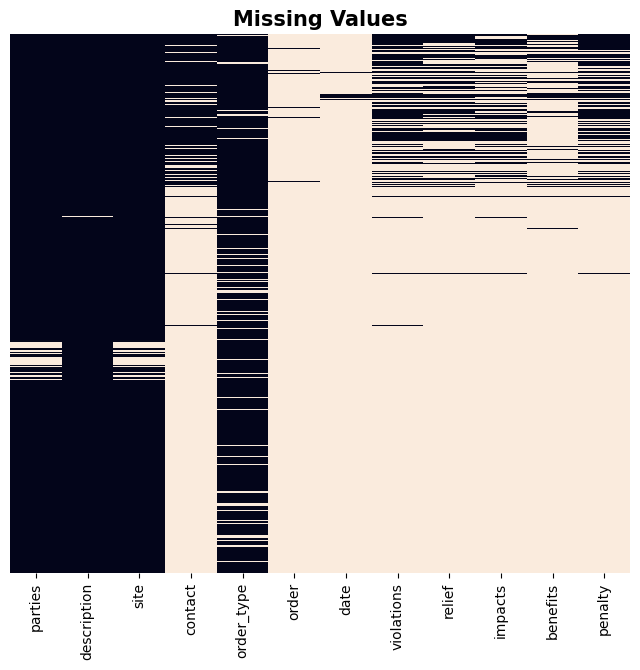

In [18]:
for col in df.columns:
    if df.query(f"{col}==''").bool:
        print(col,end=': ')
        print(len(df.query(f"{col}==''"))/df.shape[1])
## 
set_lables(title="Missing Values")
sns.heatmap(df.replace('',pd.NA).isnull(),yticklabels=False,cbar=False)

## Observation
- `date` and `order` has 63% missing values.

- `contact`, `violations`, `relief`, `impacts`, `benefits`, `penalty` has more than 50% values missing.

- And these make sense, as we know for each case all these may be applicable.

- We will have to look these columns in pairs to find any relations between them and see if some new features could be derived from them.

In [19]:
df

parties  \
0                        2023 Tesoro Martinez Clean Air Act Settlement Information Sheet   
1    Sanitary District of Highland, Indiana Clean Water Act Settlement Information Sheet   
2                 Town of Griffith, Indiana Clean Water Act Settlement Information Sheet   
3                                2023 MPLX LP Clean Air Act Settlement Information Sheet   
4           2023 The Williams Companies, Inc. Clean Air Act Settlement Information Sheet   
..                                                                                   ...   
762                        Renault Vehicules Industriels, s.a. Diesel Engines Settlement   
763          Volvo Truck Corporation (Order and Consent Decree) Diesel Engine Settlement   
764                                     FMC Corporation, Inc. Hazardous Waste Settlement   
765                                                            American Honda Settlement   
766                                                        Ford Motor Company Settlement   

                                                                                             description  \
0    (Washington, DC – April 27, 2023) The U.S. Environmental Protection Agency (EPA) and the U.S. De...   
1    (Washington, DC – April 8, 2022) - The Sanitary District of Highland, Indiana, and the Town of G...   
2    (Washington, DC – April 8, 2022) - The Sanitary District of Highland, Indiana, and the Town of G...   
3    (Denver, CO – April 20, 2023) - The U.S. Environmental Protection Agency (EPA), U.S. Department ...   
4    (Washington, DC – April 20, 2023) - The U.S. Environmental Protection Agency (EPA), the U.S. Dep...   
..                                                                                                   ...   
762  On October 22, 1998, the Department of Justice and the Environmental Protection Agency announced...   
763  On October 22, 1998, the Department of Justice and the Environmental Protection Agency announced...   
764  On October 16, 1998, settlement was reached with FMC Corporation, Inc. for numerous RCRA hazardo...   
765  American Honda Motor Co., Inc. ("Honda") will spend $267 million to settle allegations that it v...   
766  EPA filed a settlement with Ford Motor Company, in the U.S.District Court for the District of Co...   

                                                                                                    site  \
0        https://www.epa.gov/enforcement/2023-tesoro-martinez-clean-air-act-settlement-information-sheet   
1    https://www.epa.gov/enforcement/sanitary-district-highland-indiana-clean-water-act-settlement-in...   
2     https://www.epa.gov/enforcement/town-griffith-indiana-clean-water-act-settlement-information-sheet   
3                https://www.epa.gov/enforcement/2023-mplx-lp-clean-air-act-settlement-information-sheet   
4    https://www.epa.gov/enforcement/2023-williams-companies-inc-clean-air-act-settlement-information...   
..                                                                                                   ...   
762           https://www.epa.gov/enforcement/renault-vehicules-industriels-sa-diesel-engines-settlement   
763                    https://www.epa.gov/enforcement/volvo-truck-corporation-diesel-engines-settlement   
764                       https://www.epa.gov/enforcement/fmc-corporation-inc-hazardous-waste-settlement   
765                https://www.epa.gov/enforcement/american-honda-motor-company-clean-air-act-settlement   
766                          https://www.epa.gov/enforcement/ford-motor-company-clean-air-act-settlement   

                                                                                                 contact  \
0    Contact Information Patrick W. Foley\nSenior Environmental Engineer\nU.S. Environmental Protecti...   
1    Contact Information Andre DaugavietisAssociate Regional Counsel\nEPA, Region 5daugavietis.andre@...   
2    Contact Information Andre DaugavietisAssociate Region

In [20]:
df[['order','order_type']].query("order!=''")

order  \
20   Preliminary Injunction Order On March 18, 2021, the U.S. District Court for the District of Ariz...   
51   Basis for the Order Beginning in March 2018, the EPA received tips and complaints of pesticides ...   
52   Basis for the Order Beginning in December 2019, Region 10 reviewed information from tips and com...   
56   Basis for the Order On or about January 16, 2020, EPA Region 4 discovered Electrolux had importe...   
104  Summary of the Unilateral Administrative Order The scope of the Unilateral Administrative Order ...   
118  Civil Judicial Consent Decree Accolade Construction Group, Inc. (NY) agreed to disgorge $58,000 ...   
209  Summary of the Consent Decree The settlement, in the form of a consent decree, requires Shell to...   

                            order_type  
20                      Consent Decree  
51     Stop Sale, Use or Removal Order  
52     Stop Sale, Use or Removal Order  
56     Stop Sale, Use or Removal Order  
104    Unilateral Administrative Order  
118  Consent Agreement and Final Order  
209                     Consent Decree


## Observation
- we will drop `date` and `site` column as will not contribute our analysis.

- `order` column has very few column but are important, we will moving forward to keep it or remove it.

In [21]:
df.drop(['date','site'],axis=1,inplace=True)

print(f"shape after drop: {df.shape}")

shape after drop: (767, 10)


## Type of orders

In [22]:
df['order_type'].value_counts()

order_type
Consent Decree                       514
                                      67
Administrative Order on Consent       36
Consent Agreement and Final Order     30
Settlement Agreement                  29
Unilateral Administrative Order       17
Stop Sale, Use or Removal Order       15
Import Refusal                        12
Consent Agreement                     10
Agreement                              7
Administrative Penalty Order           7
Administrative Agreement               6
Administrative Order                   5
Notice of Warning                      5
Complaint                              4
Amended Consent Decree                 3
Name: count, dtype: int64

In [23]:
import re
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import remove_stopwords
from nltk.stem import WordNetLemmatizer

In [24]:
def preprocess(record):

    ## removing special char
    record = re.sub(r'[^a-zA-Z\s]'," ",record)
    
    ## removing tab and new line char
    record = record.replace('\n', ' ').replace('\t', ' ')

    ## lowering text
    record = record.lower()

    ## sent tokenize

    record = sent_tokenize(record)


    

    return record



In [25]:
df = df.applymap(preprocess)

In [26]:
lemmatizer = WordNetLemmatizer()
for col in df.columns:
    for index,row in df.iterrows():
        df.at[index,col] = " ".join([lemmatizer.lemmatize(word) for word in row[col] if word not in stopwords.words('english')])

In [27]:
df

parties  \
0                             tesoro martinez clean air act settlement information sheet   
1    sanitary district of highland  indiana clean water act settlement information sheet   
2                 town of griffith  indiana clean water act settlement information sheet   
3                                     mplx lp clean air act settlement information sheet   
4                the williams companies  inc  clean air act settlement information sheet   
..                                                                                   ...   
762                        renault vehicules industriels  s a  diesel engines settlement   
763          volvo truck corporation  order and consent decree  diesel engine settlement   
764                                     fmc corporation  inc  hazardous waste settlement   
765                                                            american honda settlement   
766                                                        ford motor company settlement   

                                                                                             description  \
0     washington  dc   april           the u s  environmental protection agency  epa  and the u s  de...   
1     washington  dc   april            the sanitary district of highland  indiana  and the town of g...   
2     washington  dc   april            the sanitary district of highland  indiana  and the town of g...   
3     denver  co   april             the u s  environmental protection agency  epa   u s  department ...   
4     washington  dc   april             the u s  environmental protection agency  epa   the u s  dep...   
..                                                                                                   ...   
762  on october           the department of justice and the environmental protection agency announced...   
763  on october           the department of justice and the environmental protection agency announced...   
764  on october           settlement was reached with fmc corporation  inc  for numerous rcra hazardo...   
765  american honda motor co   inc    honda   will spend      million to settle allegations that it v...   
766  epa filed a settlement with ford motor company  in the u s district court for the district of co...   

                                                                                                 contact  \
0    contact information patrick w  foley senior environmental engineer u s  environmental protection...   
1    contact information andre daugavietisassociate regional counsel epa  region  daugavietis andre e...   
2    contact information andre daugavietisassociate regional counsel epa  region  daugavietis andre e...   
3    contact information lauren hammond  senior assistant regional counsel                hammond lau...   
4    contact information timothy sullivan  attorney air enforcement division office of civil enforcem...   
..                                                                                                   ...   
762                                                                                                        
763                                                                                                        
764                                                                                                        
765                                                                                                        
766                                                                                                        

         order_type order  \
0    consent decree         
1                           
2                           
3    consent decree         
4    consent decree         
..              ...   ...   
762  consent decree         
763  consent decree         
764  consent decree         
765  consent decree         
766  consent decree         

                                 

In [28]:
df.columns

Index(['parties', 'description', 'contact', 'order_type', 'order',
       'violations', 'relief', 'impacts', 'benefits', 'penalty'],
      dtype='object')

In [29]:
## merge all columns to form a document for each row
X = pd.DataFrame((df['parties'] + df['description']+ df['contact'] +  df['order_type'] + df['order'] \
    + df['violations'] + df['relief'] + df ['impacts'] + df['benefits'] + df['penalty']).str.replace(r'\s+', ' ', regex=True))

print(f"shape of X: {X.shape}")

shape of X: (767, 1)


In [ ]:
corpus = []
for i in X[0]:
    corpus.append(i)
print(len(corpus))


767


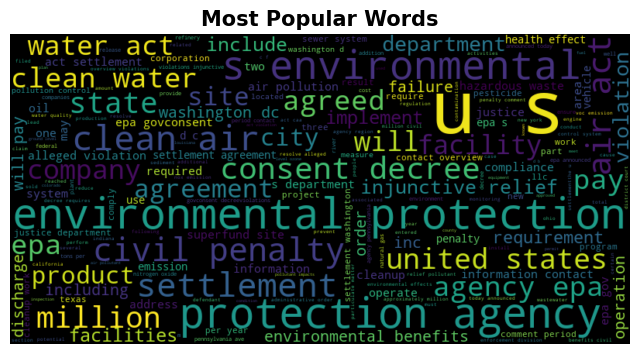

In [35]:


all_text = " ".join(X[0])

wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_text)

set_lables(title=f"Most Popular Words")
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

plt.show()

## Word to Vectors - TFIDF

In [36]:

tv = TfidfVectorizer(max_features=10000)

X_tf_vec = tv.fit_transform(X[0])


In [37]:
X_tf_vec.shape

(767, 8926)

In [38]:
X_tf_vec.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Dimensionality reduction 

In [42]:

svd = TruncatedSVD(n_components=2)
X_2d = svd.fit_transform(X_tf_vec)

print(f"shape of X_2d: {X_2d.shape}")

shape of X_2d: (767, 2)


In [43]:
X_2d = pd.DataFrame(X_2d)

## BASEMODEL KMeans Clustering

In [44]:
## define the model
km = KMeans(n_clusters=2)

## fit the model
km.fit(X_2d)

## saving the clusters for plotting
X_2d['bins'] = km.labels_


/Users/jagpreetsingh/Documents/AML_2304_NLP/assignment2/US_environment_cases/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: title={'center': 'no_of_clusers=2, TFIDF'}, xlabel='0', ylabel='1'>

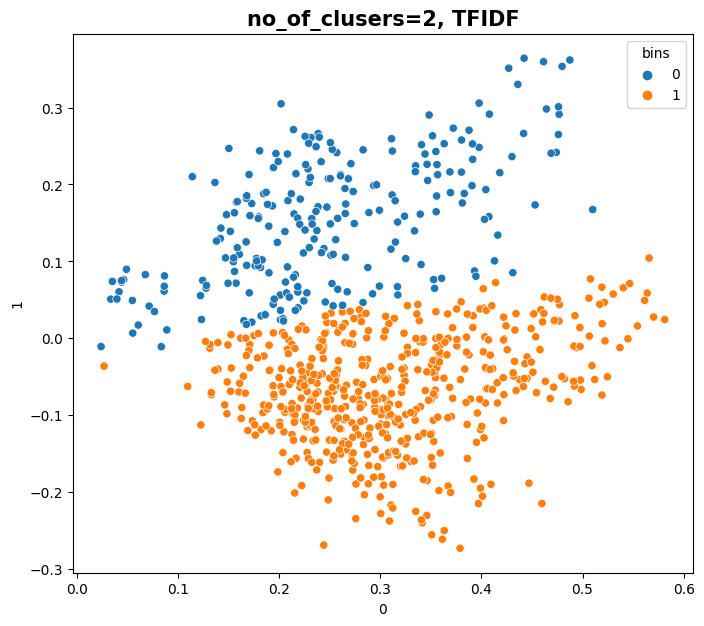

In [45]:
## plot the clusters
set_lables(title="no_of_clusers=2, TFIDF")
sns.scatterplot(x=0, y=1, data=X_2d, hue='bins')

In [46]:
## drop the bins columns
X_2d = X_2d.drop('bins',axis=1) 

## No_of_clusters using elbow method

/Users/jagpreetsingh/Documents/AML_2304_NLP/assignment2/US_environment_cases/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jagpreetsingh/Documents/AML_2304_NLP/assignment2/US_environment_cases/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jagpreetsingh/Documents/AML_2304_NLP/assignment2/US_environment_cases/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs

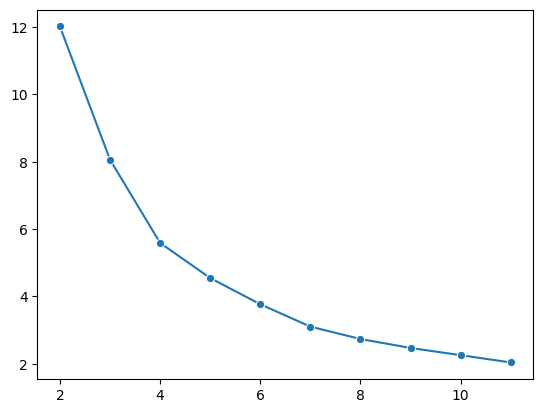

In [47]:
def no_of_clusters(data,min_cluster=2,max_cluster=8):
    wcss = []
    for i in range(min_cluster,max_cluster):
        km = KMeans(n_clusters=i,random_state=0,init = 'k-means++',verbose=0).fit(data)
        
        wcss.append(km.inertia_)
    ## ploting 
    
    # set_labels(title='Elbow Method',xlabel='No of Clusters',ylabel='WCSS')
    sns.lineplot(x=np.arange(min_cluster,max_cluster),y=wcss,marker='o')

no_of_clusters(data=X_2d,max_cluster=12)

In [48]:
## no of clusters = 4

## No_of_Clusters Using Silhoutte score

/Users/jagpreetsingh/Documents/AML_2304_NLP/assignment2/US_environment_cases/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jagpreetsingh/Documents/AML_2304_NLP/assignment2/US_environment_cases/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2 The average silhouette_score is : 0.4193610230974375
For n_clusters = 3 The average silhouette_score is : 0.3988033464137923


/Users/jagpreetsingh/Documents/AML_2304_NLP/assignment2/US_environment_cases/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 4 The average silhouette_score is : 0.40042158390562316


/Users/jagpreetsingh/Documents/AML_2304_NLP/assignment2/US_environment_cases/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 5 The average silhouette_score is : 0.36545152043960333


/Users/jagpreetsingh/Documents/AML_2304_NLP/assignment2/US_environment_cases/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 6 The average silhouette_score is : 0.36485788211746845


/Users/jagpreetsingh/Documents/AML_2304_NLP/assignment2/US_environment_cases/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 7 The average silhouette_score is : 0.37647450922515646


/Users/jagpreetsingh/Documents/AML_2304_NLP/assignment2/US_environment_cases/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 8 The average silhouette_score is : 0.3749322922915912
For n_clusters = 9 The average silhouette_score is : 0.35695198761548197


/Users/jagpreetsingh/Documents/AML_2304_NLP/assignment2/US_environment_cases/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


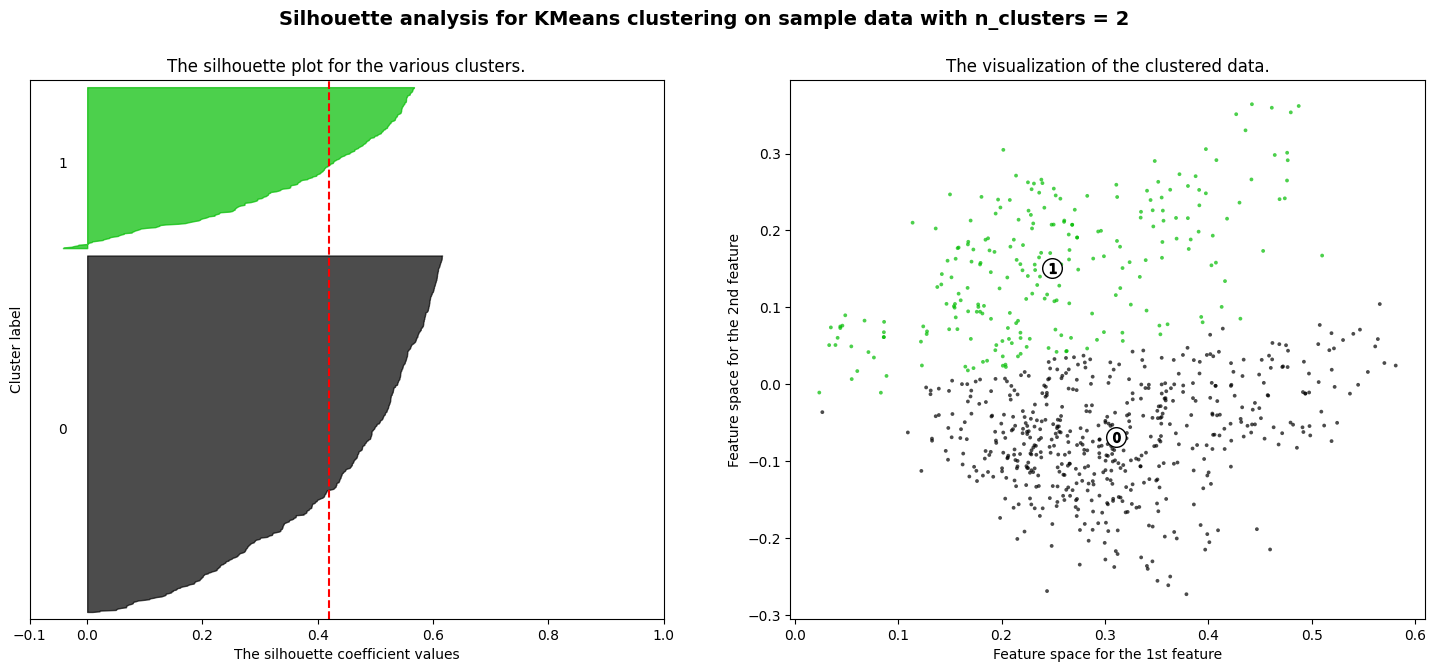

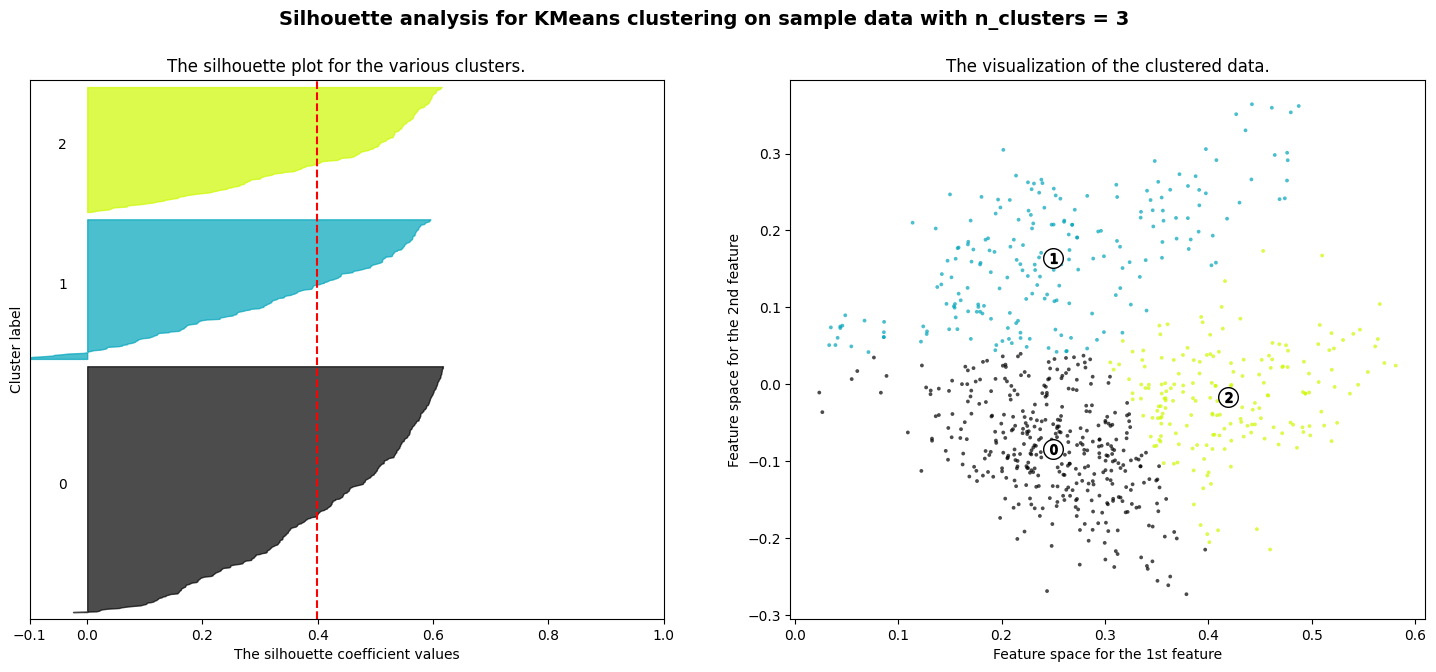

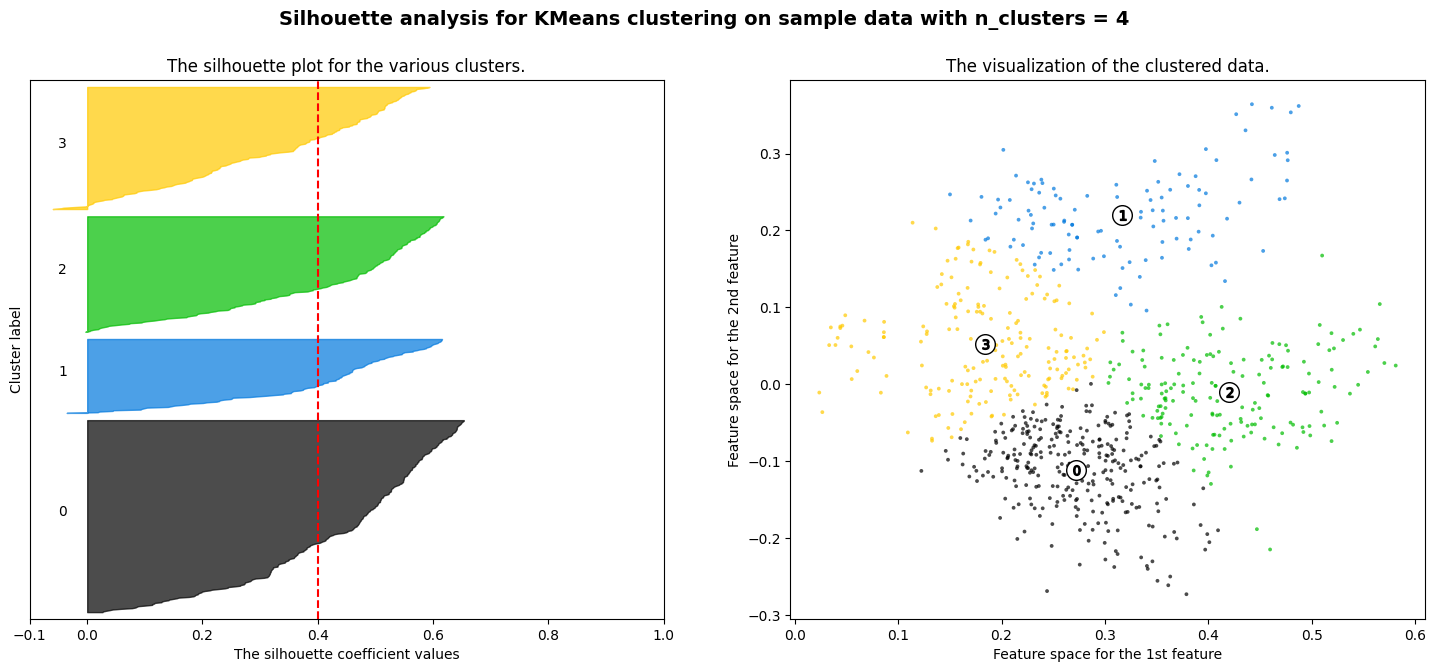

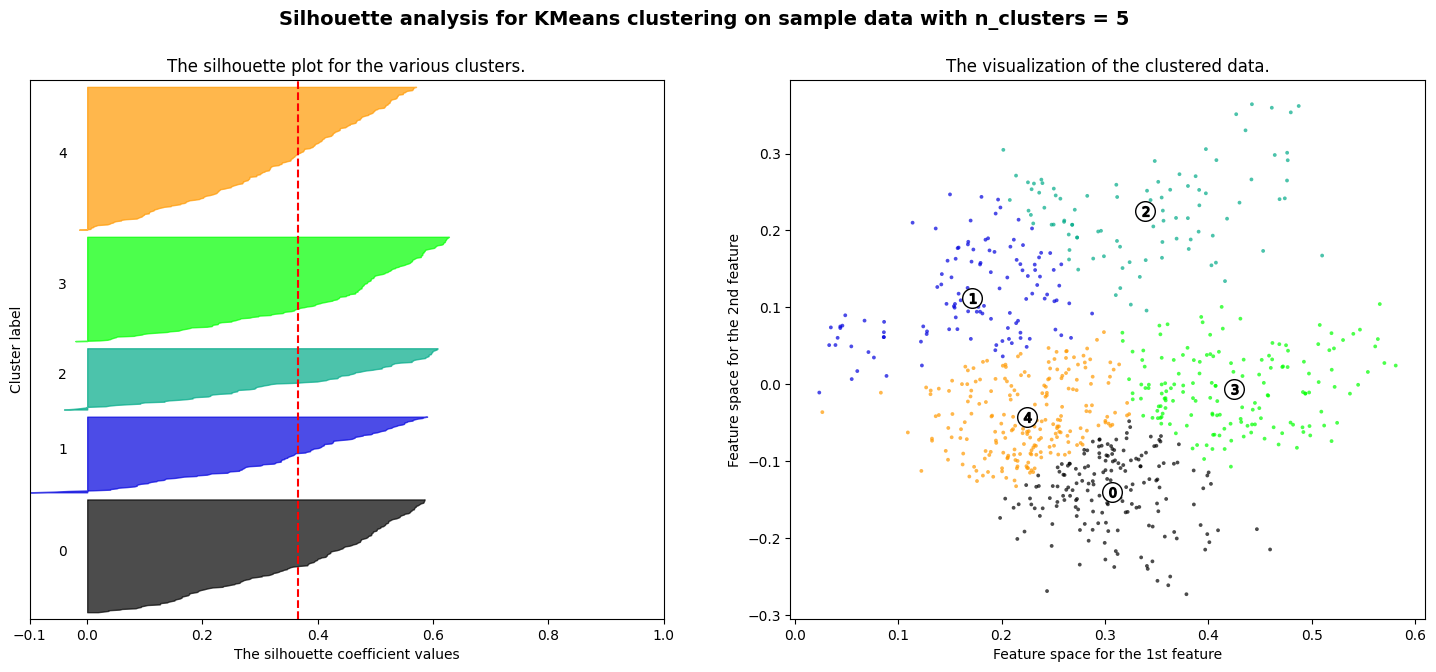

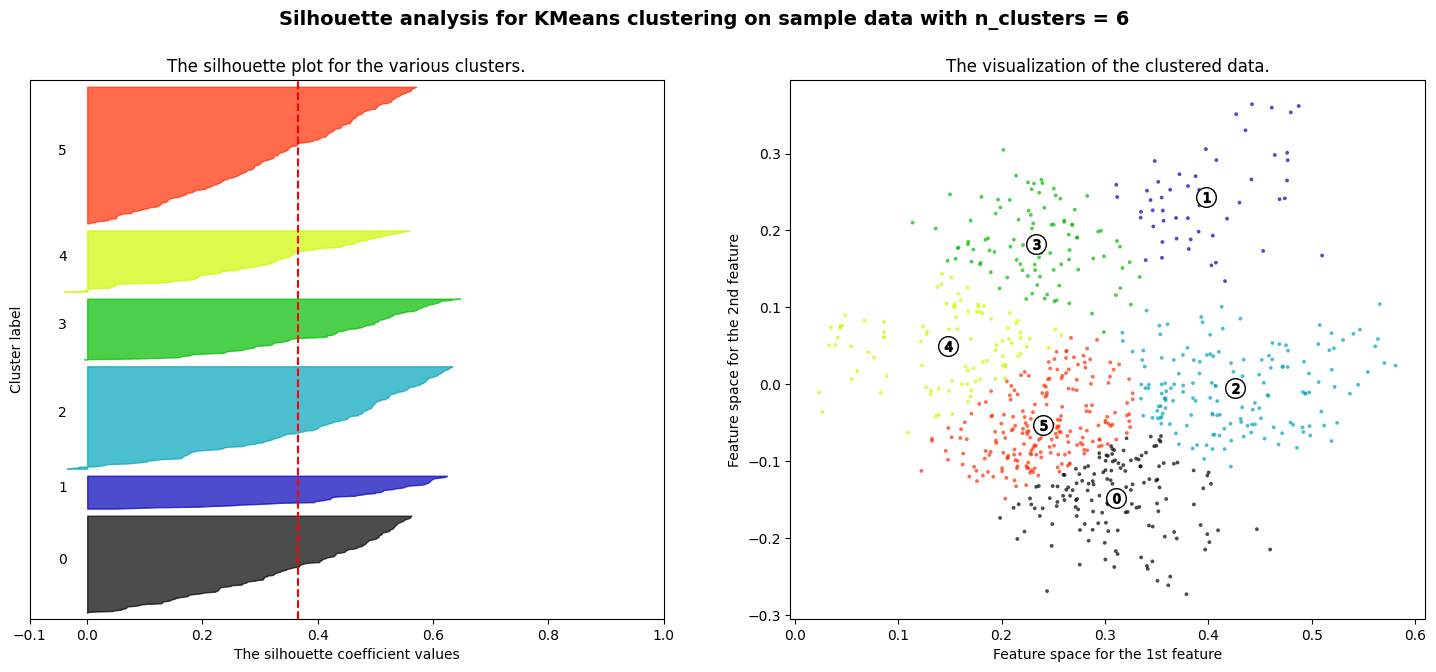

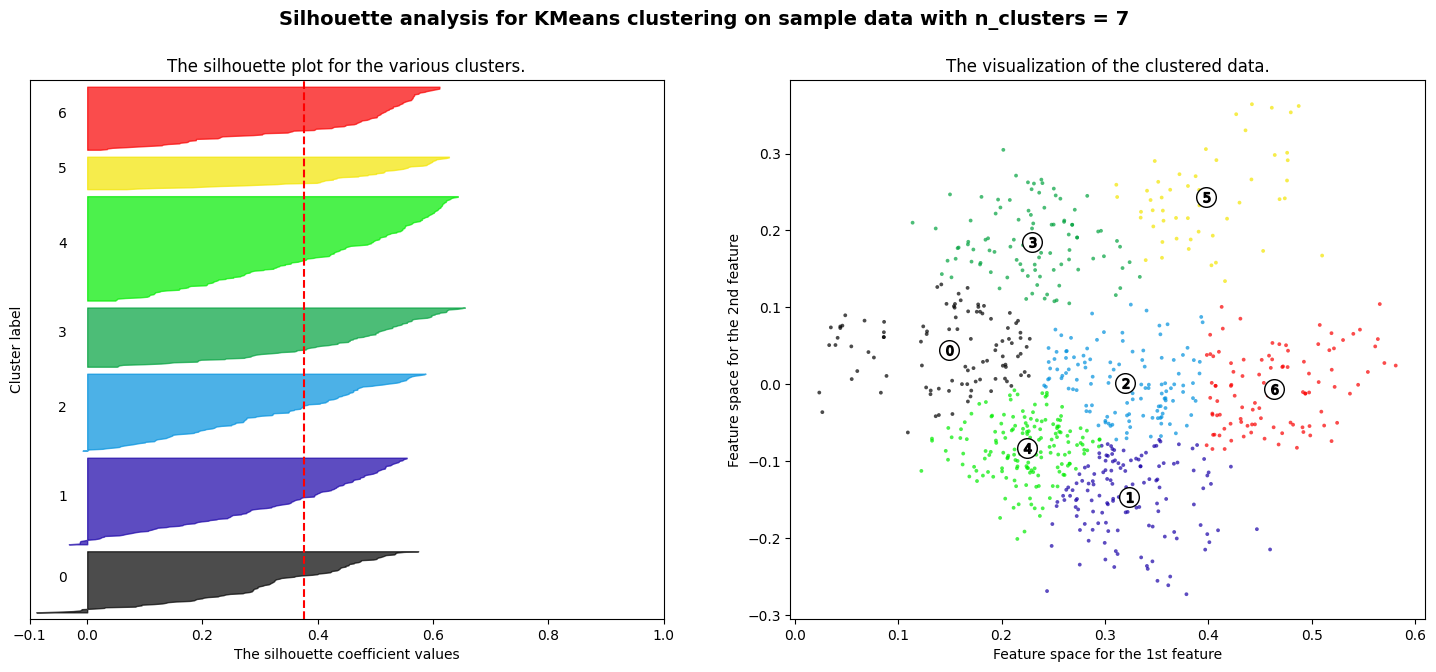

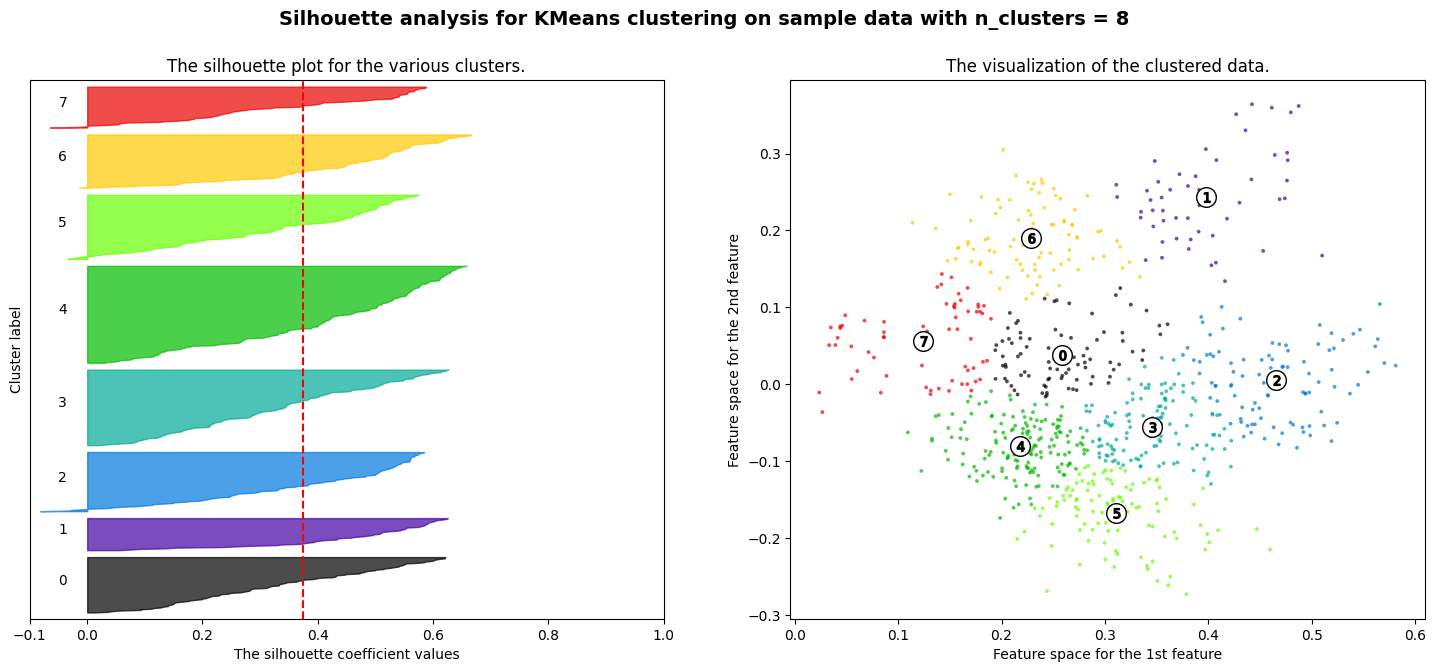

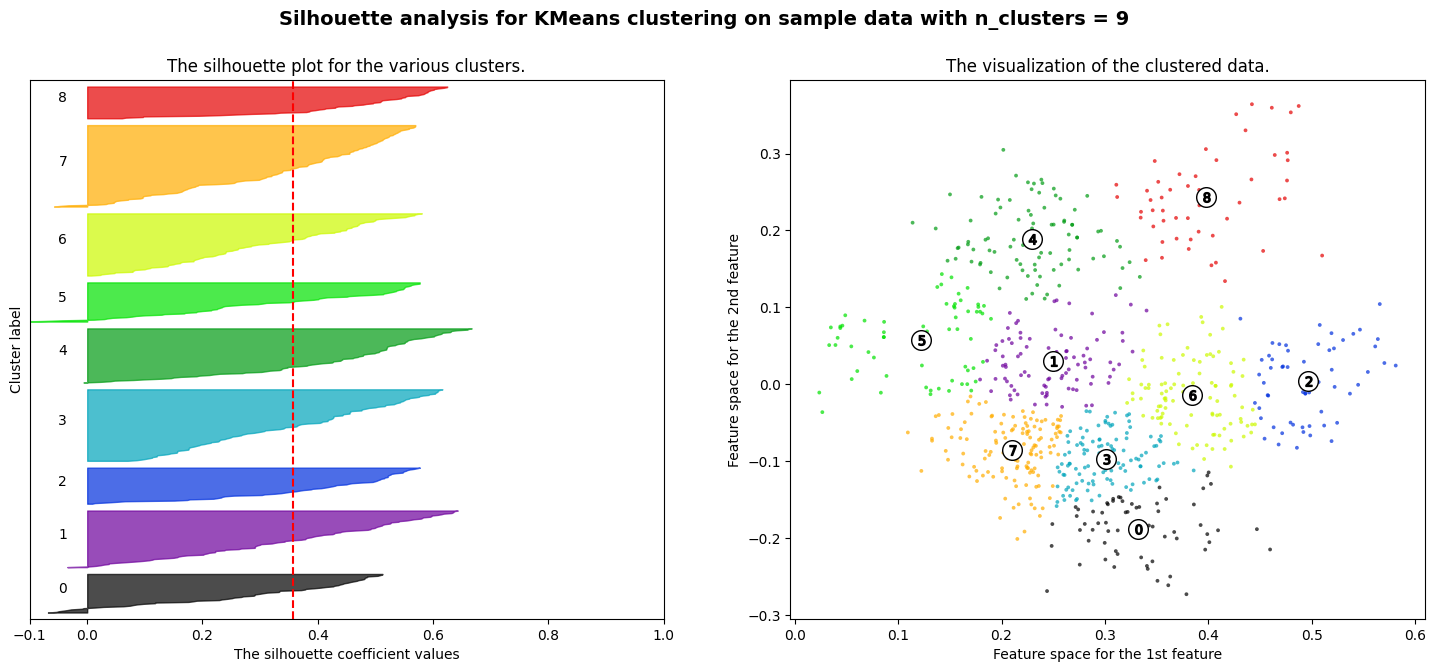

In [49]:

def silhouette_analysis(range_n_clusters):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X_2d)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X_2d, cluster_labels)
        print("For n_clusters =", n_clusters,
            "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X_2d, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                            0, ith_cluster_silhouette_values,
                            facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X_2d[0],X_2d[1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                    "with n_clusters = %d" % n_clusters),
                    fontsize=14, fontweight='bold')

    plt.show()
range_n_clusters = [2,3,4,5,6,7,8,9]
silhouette_analysis(range_n_clusters)

## Observatiion
- We got a Silhoutte score of `0.4189` for clusters=2 and a score of `0.4007` with very few negative(overlapping) silhoutte coefficient values.

- We will select `4` as our final clusters, we should choose greater no_of_clusers to avoid overfitting for our classification model.

- And we got `no_of_clusers=4` from our `elbow method` as well.


## Final Clusters KMeans

In [51]:
## no_of_clusters=4
## define model
km = KMeans(n_clusters=4,random_state=1)
km.fit(X_2d)

X_2d['bins'] = km.labels_
X['bins'] = km.labels_

/Users/jagpreetsingh/Documents/AML_2304_NLP/assignment2/US_environment_cases/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: title={'center': 'Final Clusters - TFIDF'}, xlabel='0', ylabel='1'>

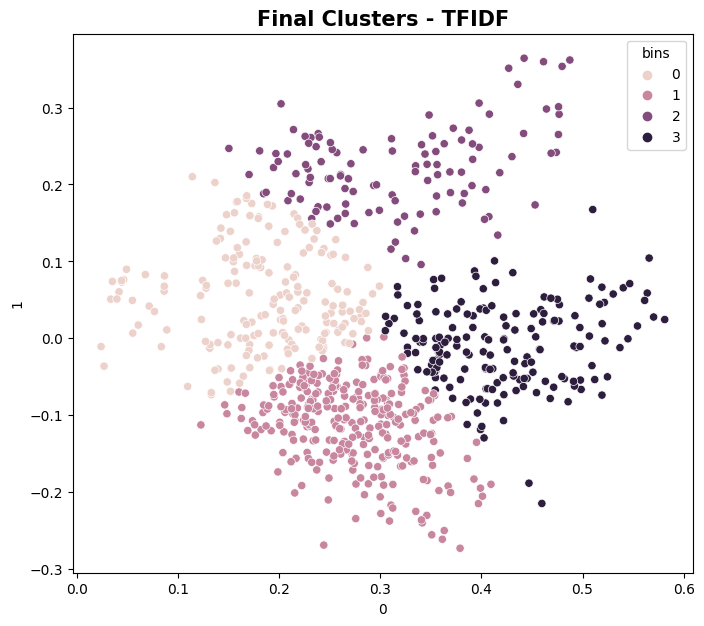

In [52]:
set_lables(title='Final Clusters - TFIDF')
sns.scatterplot(x=0, y=1, data=X_2d, hue='bins')

## WordCloud for Each class

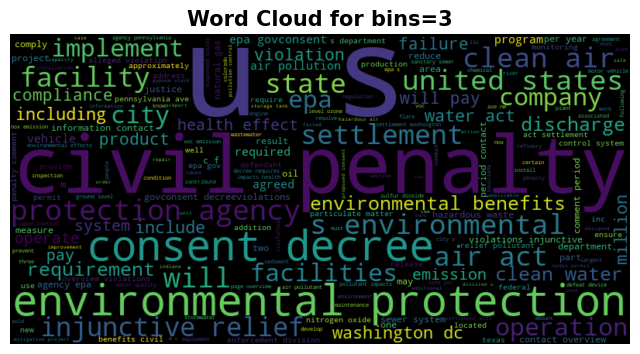

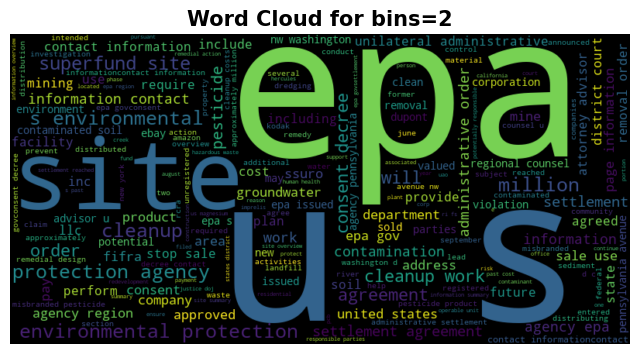

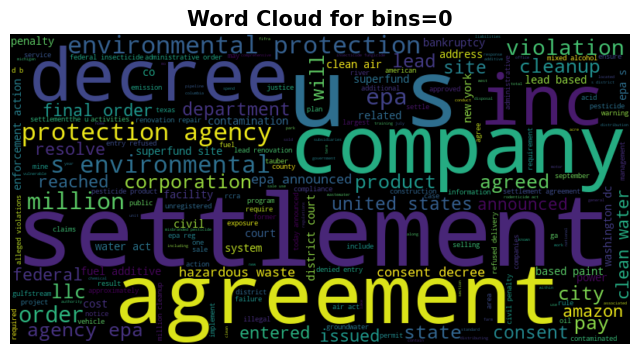

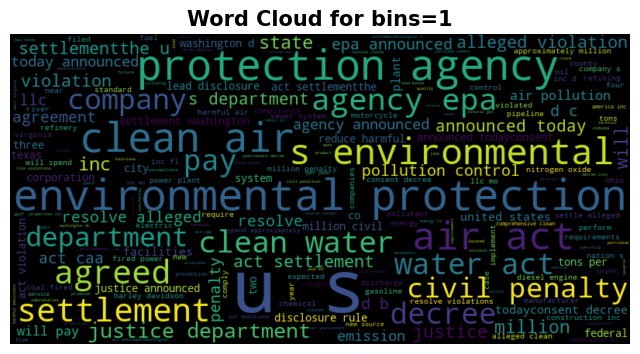

In [53]:
for i in X.bins.unique():
    text = X.query(f"bins=={i}")
    all_text = " ".join(text[0])
    
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_text)

    set_lables(title=f"Word Cloud for bins={i}")
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    
    plt.show()

## Observation
- **bins=0**
    - the frequent words `settlement`, `agreement`, `violation`, `protection agency`.

- **bins=1** 
    - the frequent words `civil penalty`, `clean water`, `clean air`, `population control`.

- **bins=2**
    - the frequent words `pesticide`, `contamination`, `consent decree`, `mining`.

- **bins=3**
    - the frequent words `civil penalty`, `environmental benefits`, `environmental protection`, `injuctive relief`.

In [45]:
X = X.drop('bins',axis=1)

In [55]:

model = SentenceTransformer('clips/mfaq')
     

/Users/jagpreetsingh/Documents/AML_2304_NLP/assignment2/US_environment_cases/venv/lib/python3.10/site-packages/transformers/configuration_utils.py:380: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


In [56]:

embedder = SentenceTransformer('all-MiniLM-L6-v2')


corpus_embeddings = embedder.encode(corpus)

# Normalize the embeddings to unit length
corpus_embeddings = corpus_embeddings /  np.linalg.norm(corpus_embeddings, axis=1, keepdims=True)
     

In [57]:
print(f"shape after embedding: {corpus_embeddings.shape}")
     

shape after embedding: (767, 384)


## Dimenstionality Reduction

In [58]:

svd = TruncatedSVD(n_components=2)
X_2d = svd.fit_transform(corpus_embeddings)

print(f"shape of X_2d: {X_2d.shape}")

X_2d = pd.DataFrame(X_2d)

shape of X_2d: (767, 2)


## BASEMODEL  no_of_clusters=2

In [59]:
## base model
clustering_model = KMeans(n_clusters=2)
clustering_model.fit(corpus_embeddings)
X_2d['bins'] = clustering_model.labels_


/Users/jagpreetsingh/Documents/AML_2304_NLP/assignment2/US_environment_cases/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: title={'center': 'no_of_clusers=2, '}, xlabel='0', ylabel='1'>

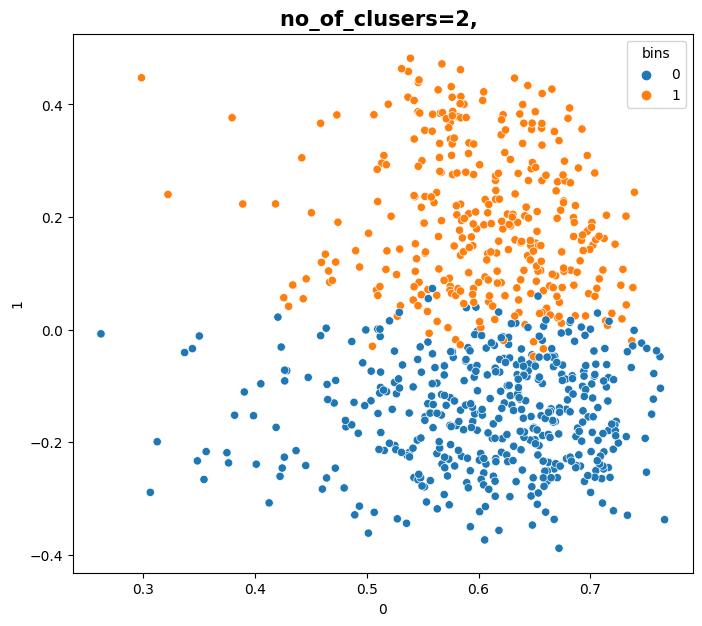

In [60]:
## plot the clusters
set_lables(title="no_of_clusers=2, ")
sns.scatterplot(x=0, y=1, data=X_2d, hue='bins')

In [61]:
## drop the bins columns
X_2d = X_2d.drop('bins',axis=1) 

## No_of_clusters using elbow method

/Users/jagpreetsingh/Documents/AML_2304_NLP/assignment2/US_environment_cases/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jagpreetsingh/Documents/AML_2304_NLP/assignment2/US_environment_cases/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jagpreetsingh/Documents/AML_2304_NLP/assignment2/US_environment_cases/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs

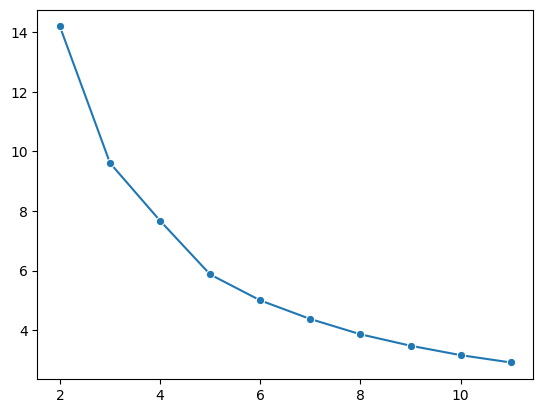

In [62]:
def no_of_clusters(data,min_cluster=2,max_cluster=8):
    wcss = []
    for i in range(min_cluster,max_cluster):
        km = KMeans(n_clusters=i,random_state=0,init = 'k-means++',verbose=0).fit(data)
        
        wcss.append(km.inertia_)
    ## ploting 
    
    # set_labels(title='Elbow Method',xlabel='No of Clusters',ylabel='WCSS')
    sns.lineplot(x=np.arange(min_cluster,max_cluster),y=wcss,marker='o')

no_of_clusters(data=X_2d,max_cluster=12)

In [63]:
## no of clusters = 5

## No_of_Clusters Using Silhoutte score

/Users/jagpreetsingh/Documents/AML_2304_NLP/assignment2/US_environment_cases/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jagpreetsingh/Documents/AML_2304_NLP/assignment2/US_environment_cases/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2 The average silhouette_score is : 0.51217806
For n_clusters = 3 The average silhouette_score is : 0.4095525


/Users/jagpreetsingh/Documents/AML_2304_NLP/assignment2/US_environment_cases/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 4 The average silhouette_score is : 0.35608283


/Users/jagpreetsingh/Documents/AML_2304_NLP/assignment2/US_environment_cases/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 5 The average silhouette_score is : 0.38086817


/Users/jagpreetsingh/Documents/AML_2304_NLP/assignment2/US_environment_cases/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 6 The average silhouette_score is : 0.37833625


/Users/jagpreetsingh/Documents/AML_2304_NLP/assignment2/US_environment_cases/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 7 The average silhouette_score is : 0.34953222


/Users/jagpreetsingh/Documents/AML_2304_NLP/assignment2/US_environment_cases/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 8 The average silhouette_score is : 0.3660962


/Users/jagpreetsingh/Documents/AML_2304_NLP/assignment2/US_environment_cases/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 9 The average silhouette_score is : 0.3523451


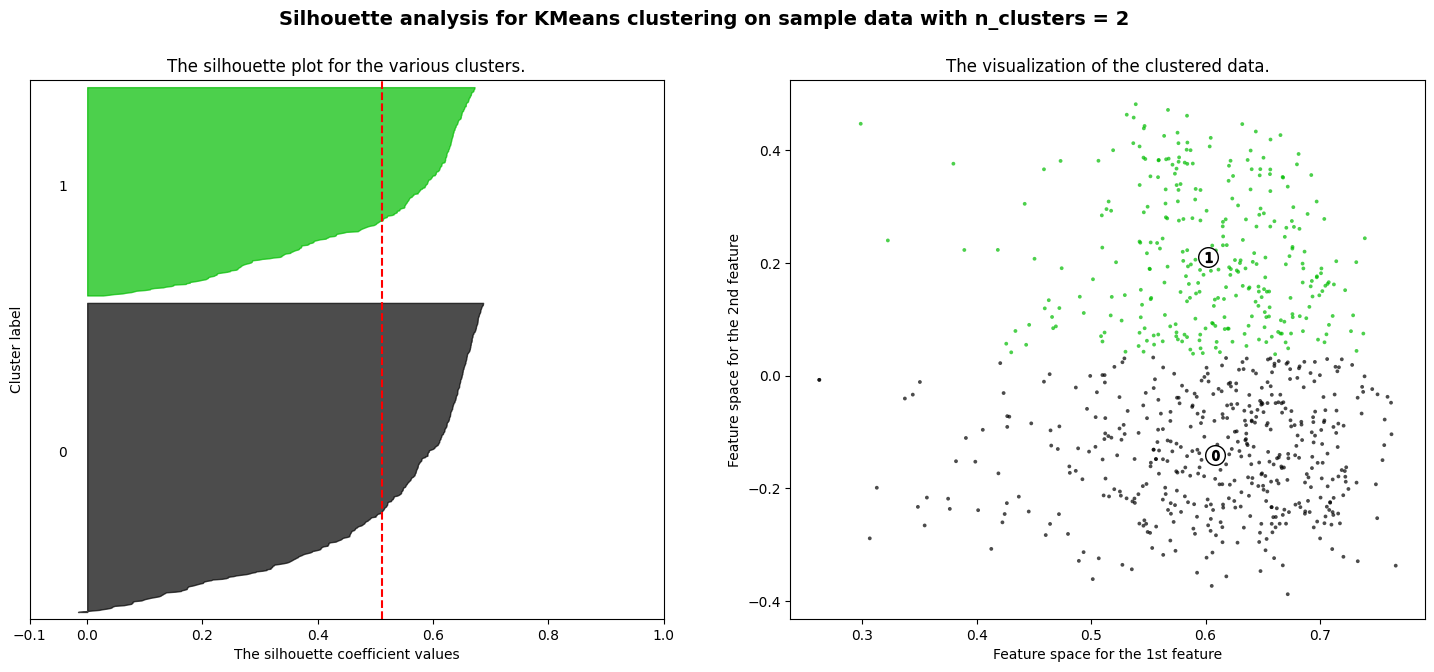

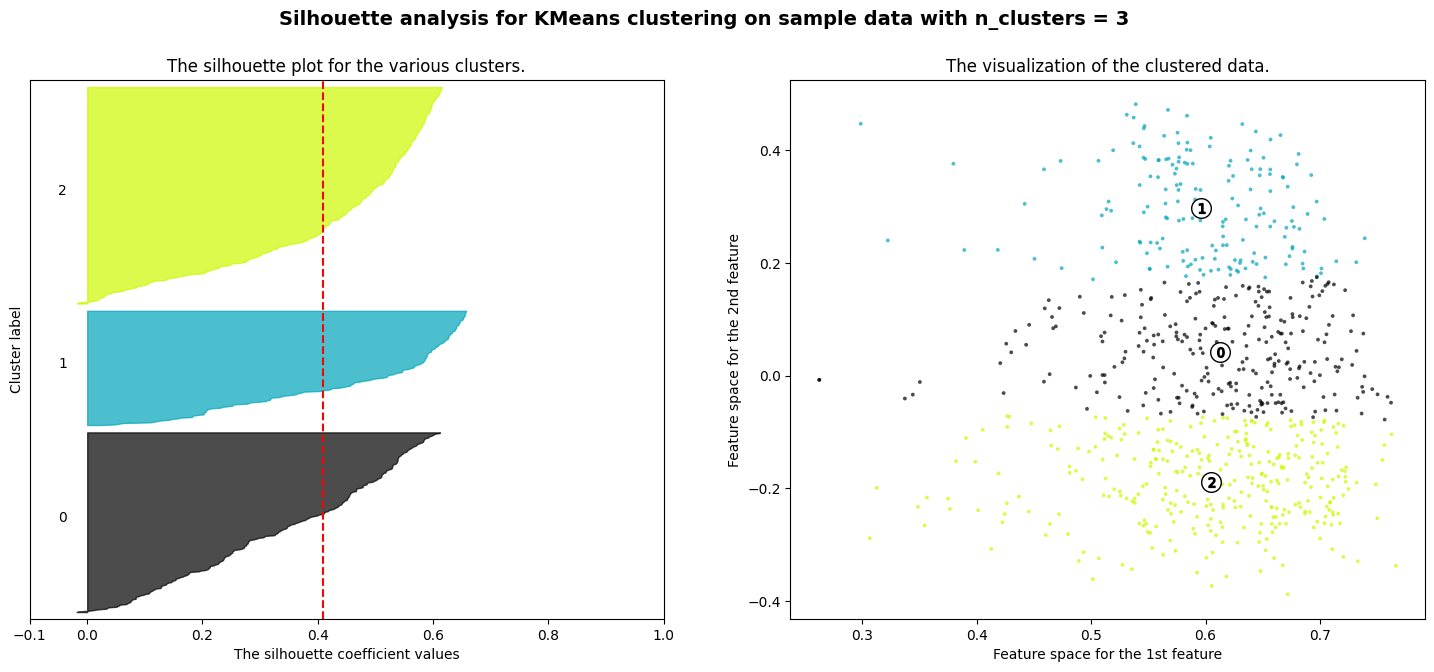

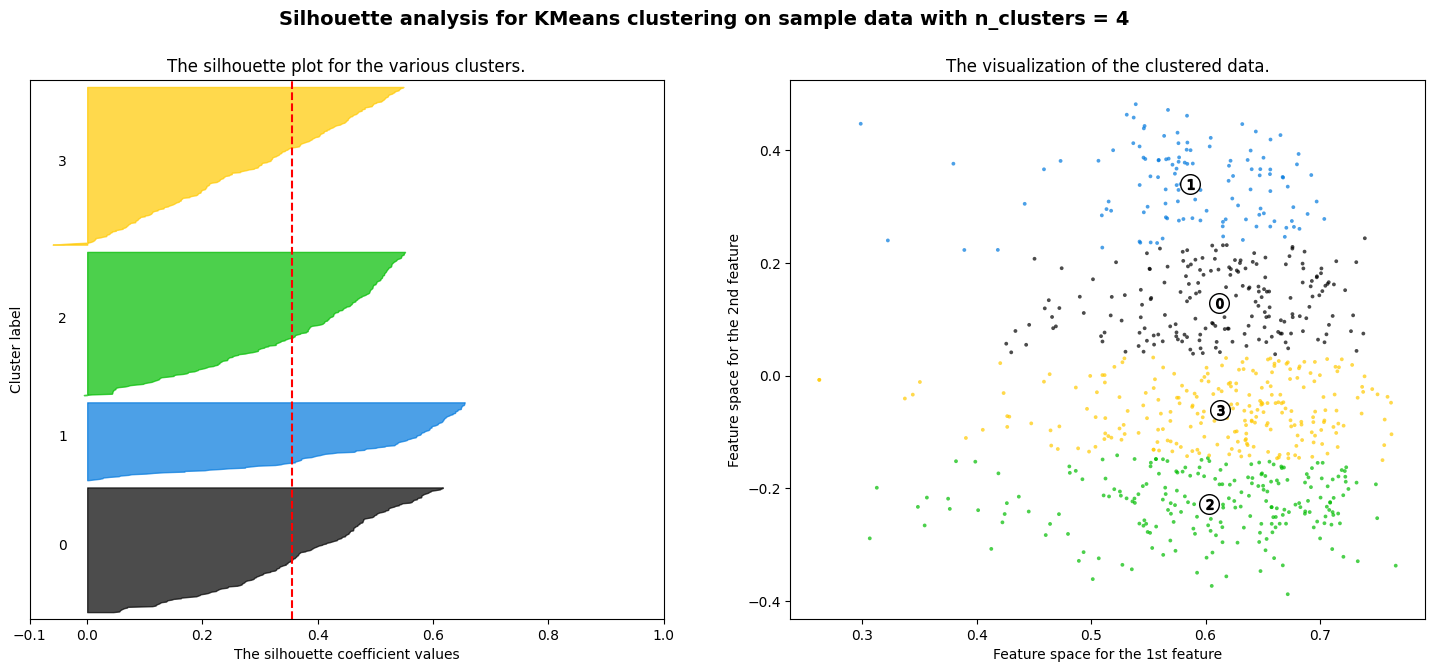

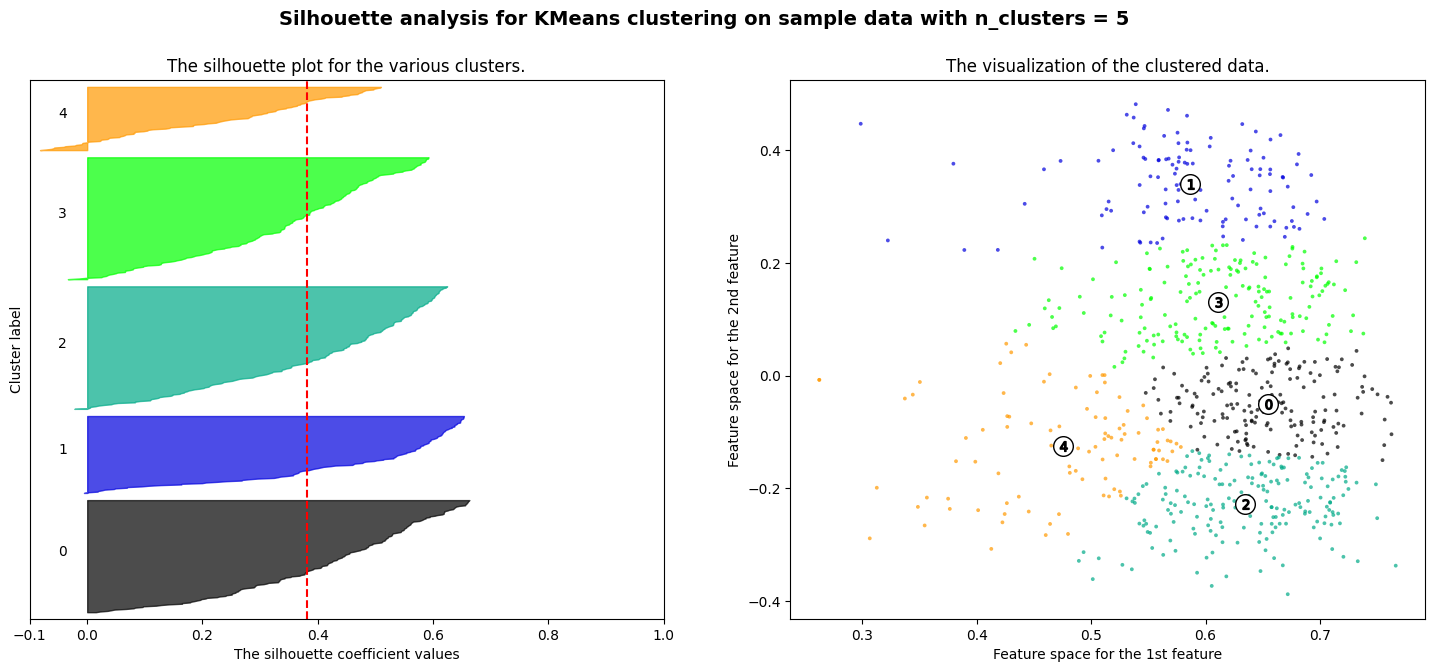

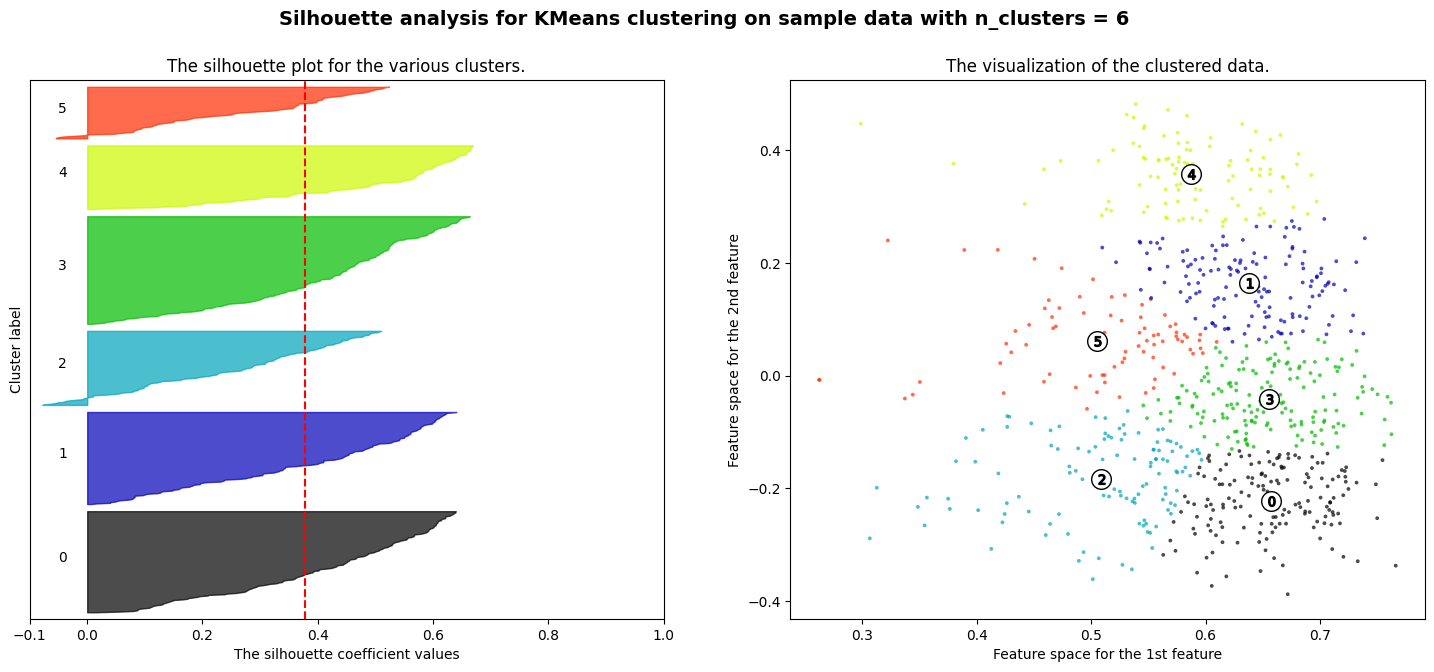

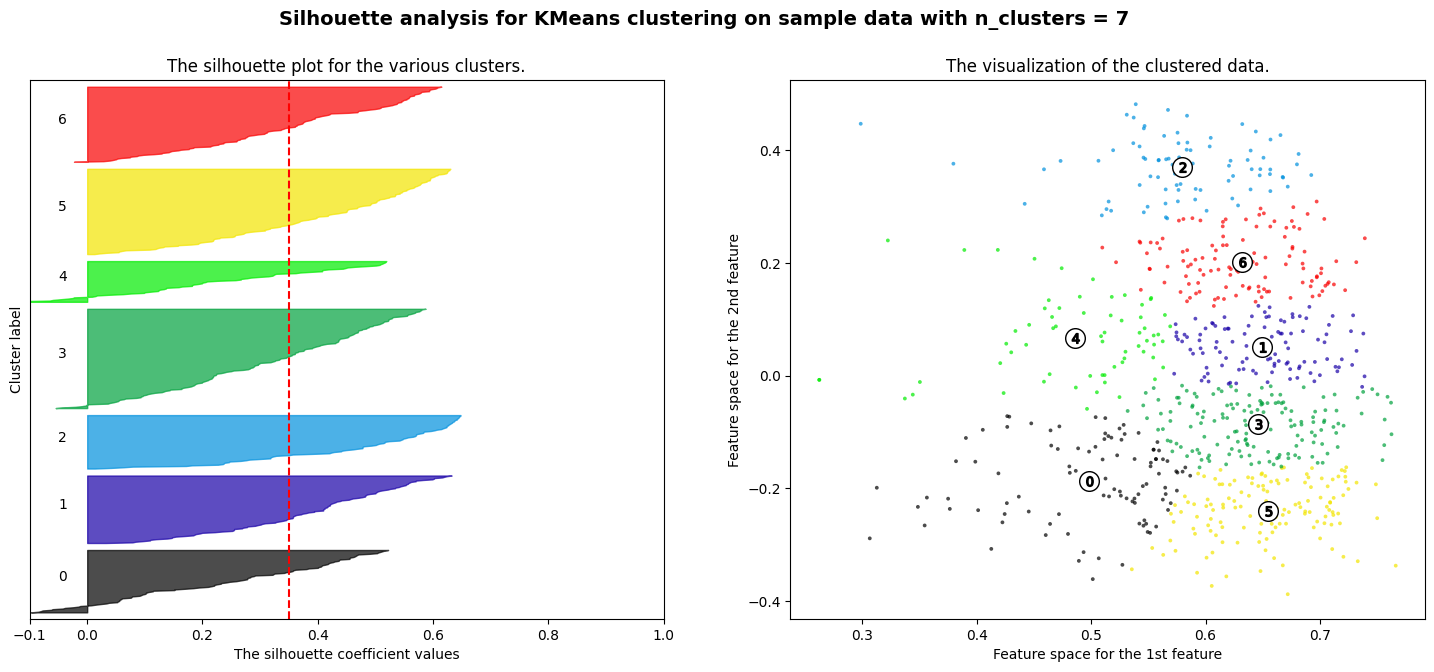

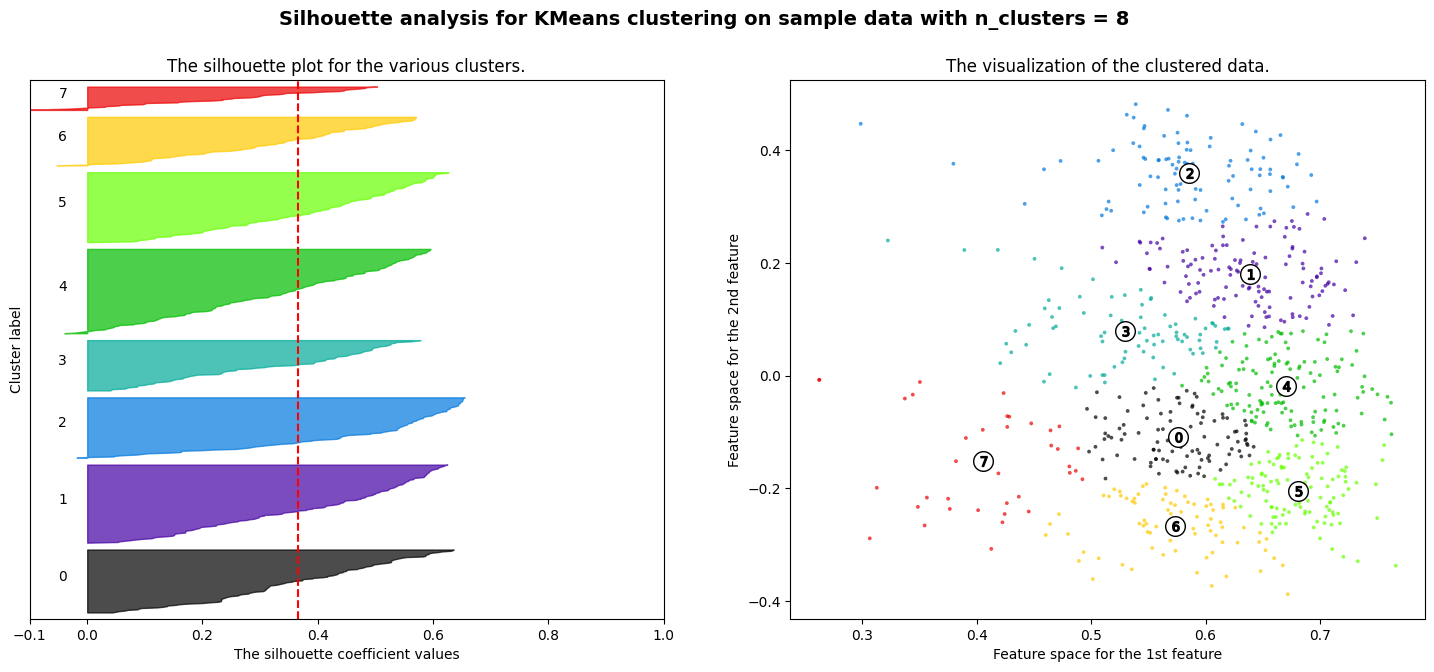

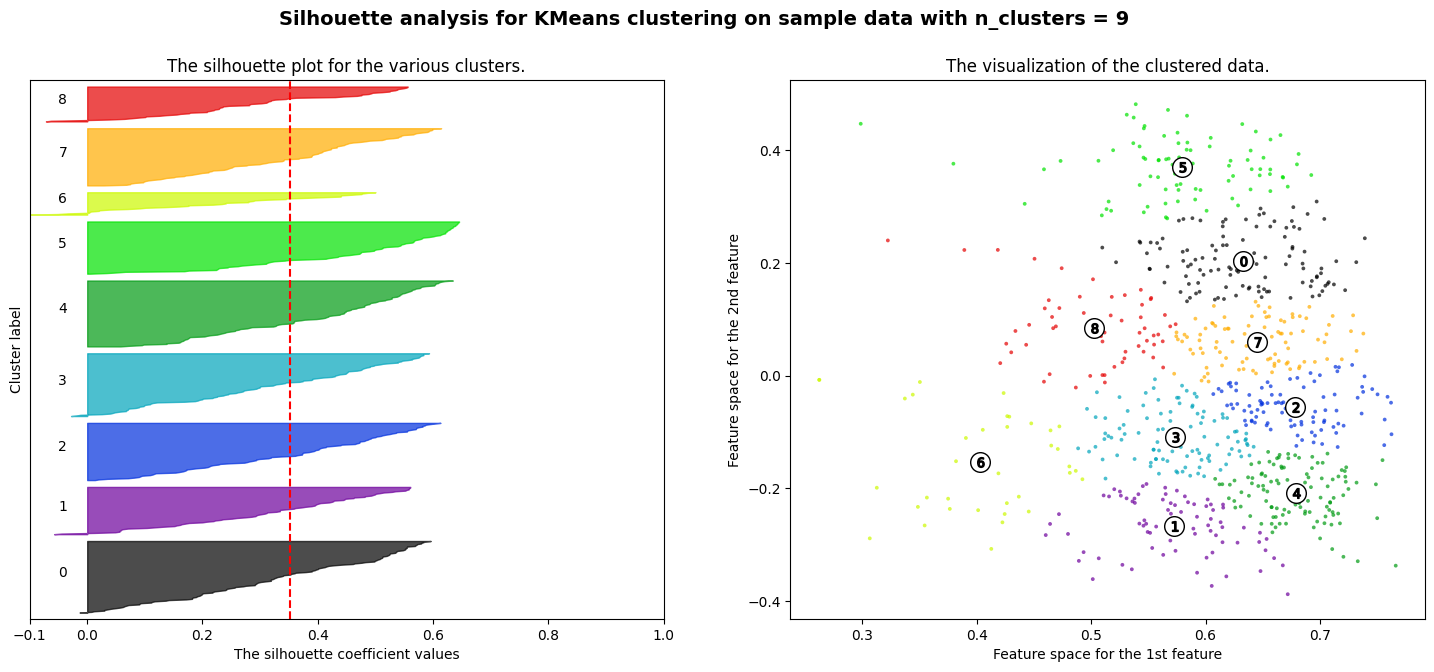

In [64]:

def silhouette_analysis(range_n_clusters):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X_2d)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X_2d, cluster_labels)
        print("For n_clusters =", n_clusters,
            "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X_2d, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                            0, ith_cluster_silhouette_values,
                            facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X_2d[0],X_2d[1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                    "with n_clusters = %d" % n_clusters),
                    fontsize=14, fontweight='bold')

    plt.show()
range_n_clusters = [2,3,4,5,6,7,8,9]
silhouette_analysis(range_n_clusters)

## Observation
- for cluster=2 silhoutte score is `.5121` with minimal negative values(overlapping) in silhoutte coeficient.

- for cluster=3 silhoutte score is `.4095` with very few negative values(overlapping) in silhoutte coeficient.

- for cluster=5 silhoutte score is `0.3808` with signifact negative value(overlapping)s in silhoutte coeficient.

- we will choose `no_of_cluser=3` as for our final classes, as 2 may lead to overfitting.

## Final Clusters KMeans

In [66]:
## no_of_clusters=3
## define model
km = KMeans(n_clusters=3,random_state=1)
km.fit(X_2d)

X_2d['bins'] = km.labels_
X['bins'] = km.labels_

/Users/jagpreetsingh/Documents/AML_2304_NLP/assignment2/US_environment_cases/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<Axes: title={'center': 'Final Clusters '}, xlabel='0', ylabel='1'>

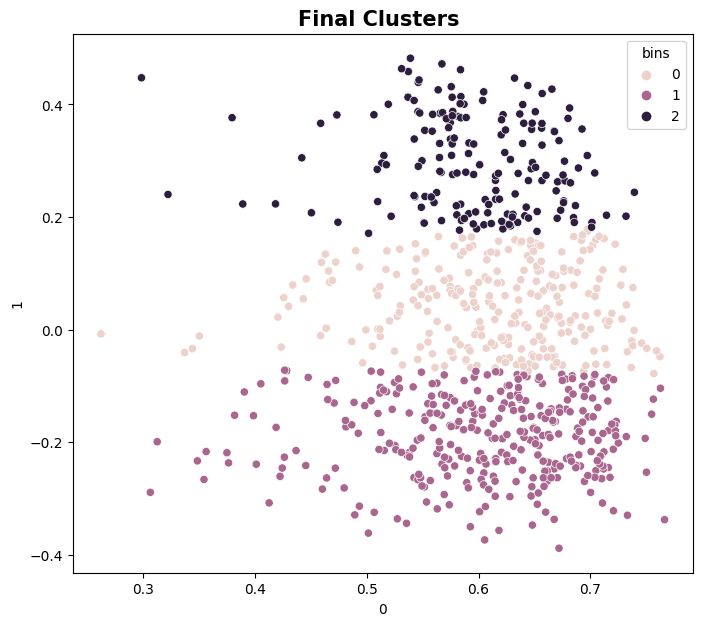

In [67]:
set_lables(title='Final Clusters ')
sns.scatterplot(x=0, y=1, data=X_2d, hue='bins')

## WordCloud for Each class

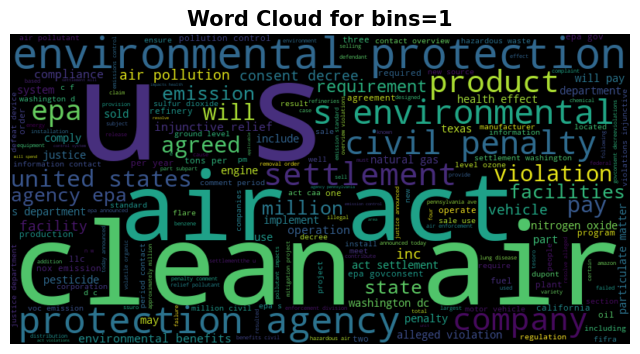

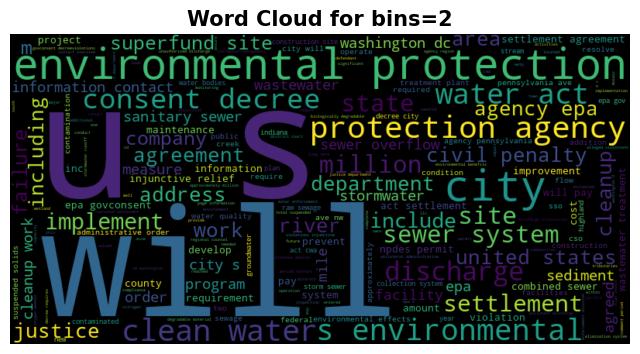

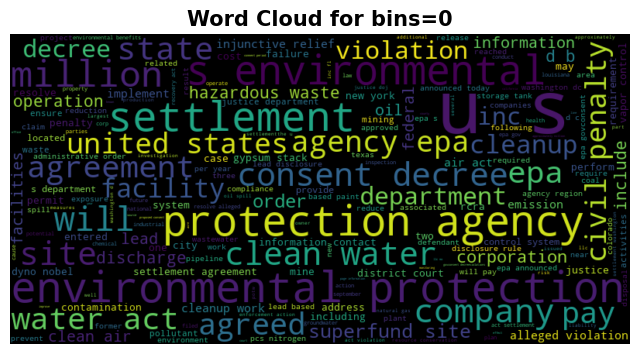

In [68]:
for i in X.bins.unique():
    text = X.query(f"bins=={i}")
    all_text = " ".join(text[0])
    
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_text)

    set_lables(title=f"Word Cloud for bins={i}")
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    
    plt.show()

## Observation
- **bins=0**
    - frequent words `settlement`,`violation`, `consent decree`, `water act`.

- **bins=1**
    - frequent words `air act`, `environmental protection`, `emision`, `civil penalty`, `violation`.

- **bins=2**
    - frequent words `protection agency`, `stormwater`, `justice`, `clean water`, `sanitary sewer`.


##  Classification

In [69]:
predictors = X_2d.drop('bins',axis=1) 
y = X_2d['bins']

print(f"shape of predictors: {predictors.shape}")
print(f"shape of y: {y.shape}")

shape of predictors: (767, 2)
shape of y: (767,)


In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(predictors, y, random_state=1)

print(f"shape of X_train: {X_train.shape}")
print(f"shape of X_test: {X_test.shape}")
print(f"shape of y_train: {y_train.shape}")
print(f"shape of y_test: {y_test.shape}")



shape of X_train: (575, 2)
shape of X_test: (192, 2)
shape of y_train: (575,)
shape of y_test: (192,)


## Metrics

In [72]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 

In [73]:
def evaluation_classification(y_pred, y_test,model):
    """
    y_pred: predicted values
    y_test: true values
    """
    print(f"{model}")
    print(f"Accuracy Score: {accuracy_score(y_pred,y_test)}")
    print(f"Classification Report: \n{classification_report(y_pred,y_test)}")
    print(f"Confusion Matrix: \n{confusion_matrix(y_pred,y_test)}")

    set_lables(title=f'Confusion Matrix for {model}')
    sns.heatmap(confusion_matrix(y_pred,y_test),annot=True)
    plt.show()
    

## Decision Tree Classifier

train data evaluation:
 
DecisionTreeClassifier
Accuracy Score: 1.0
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       205
           1       1.00      1.00      1.00       243
           2       1.00      1.00      1.00       127

    accuracy                           1.00       575
   macro avg       1.00      1.00      1.00       575
weighted avg       1.00      1.00      1.00       575

Confusion Matrix: 
[[205   0   0]
 [  0 243   0]
 [  0   0 127]]


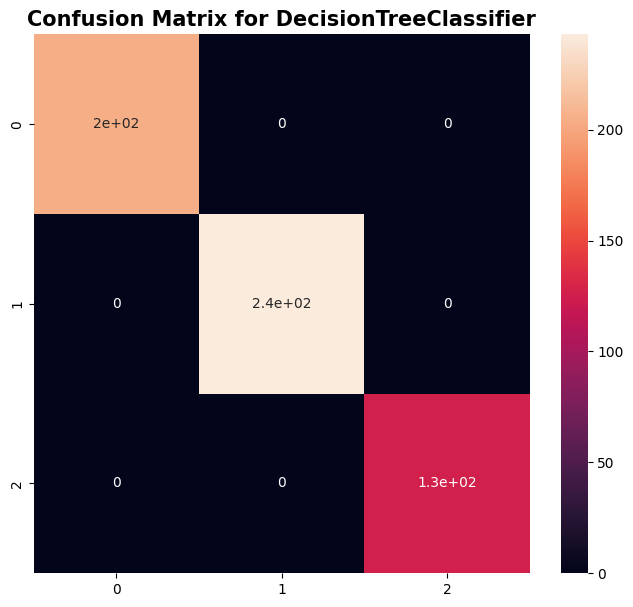

Test data evaluation:

DecisionTreeClassifier
Accuracy Score: 0.984375
Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.97      0.98        66
           1       0.98      0.99      0.98        81
           2       1.00      1.00      1.00        45

    accuracy                           0.98       192
   macro avg       0.99      0.99      0.99       192
weighted avg       0.98      0.98      0.98       192

Confusion Matrix: 
[[64  2  0]
 [ 1 80  0]
 [ 0  0 45]]


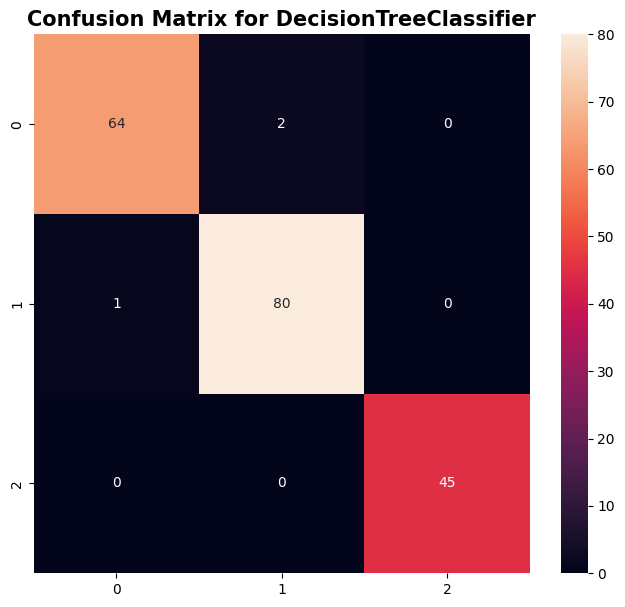

In [78]:
## define the model
dtc = DecisionTreeClassifier(random_state=0)

## train the model
dtc.fit(X_train,y_train)

## training prediction
train_pred_dtc = dtc.predict(X_train)


print(f"train data evaluation:\n ")
evaluation_classification(train_pred_dtc,y_train,model='DecisionTreeClassifier')

## test prediction
y_pred_dtc = dtc.predict(X_test)

print(f"Test data evaluation:\n")
evaluation_classification(y_pred_dtc,y_test,model='DecisionTreeClassifier')

## Random Forest Classifier

train data evaluation:
 
RandomForestClassifier train
Accuracy Score: 1.0
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       205
           1       1.00      1.00      1.00       243
           2       1.00      1.00      1.00       127

    accuracy                           1.00       575
   macro avg       1.00      1.00      1.00       575
weighted avg       1.00      1.00      1.00       575

Confusion Matrix: 
[[205   0   0]
 [  0 243   0]
 [  0   0 127]]


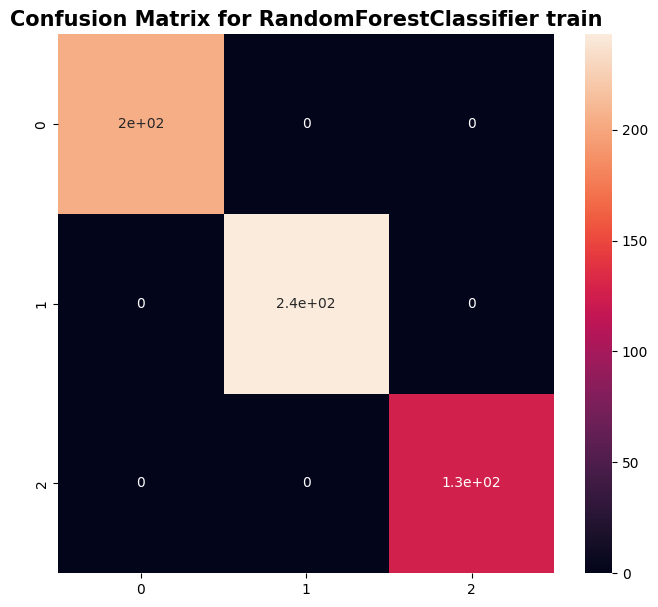

Test data evaluation:

RandomForestClassifier test
Accuracy Score: 0.984375
Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.97      0.98        66
           1       0.98      0.99      0.98        81
           2       1.00      1.00      1.00        45

    accuracy                           0.98       192
   macro avg       0.99      0.99      0.99       192
weighted avg       0.98      0.98      0.98       192

Confusion Matrix: 
[[64  2  0]
 [ 1 80  0]
 [ 0  0 45]]


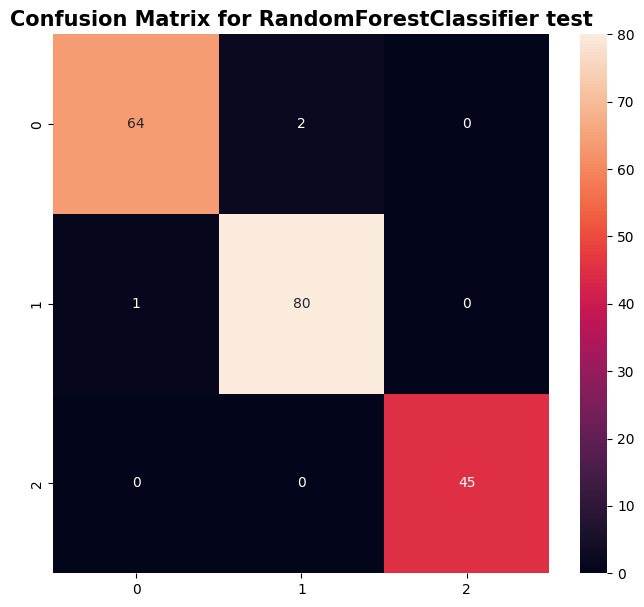

In [80]:
## define the model
rfr = RandomForestClassifier(random_state=0)

## train the model
rfr.fit(X_train,y_train)

## training prediction
train_pred_rfr = rfr.predict(X_train)


print(f"train data evaluation:\n ")
evaluation_classification(train_pred_rfr,y_train,model='RandomForestClassifier train')

## test prediction
y_pred_rfr = dtc.predict(X_test)

print(f"Test data evaluation:\n")
evaluation_classification(y_pred_rfr,y_test,model='RandomForestClassifier test')

## Observation
- **DecisionTreeClassifier** 
    - Training Accuracy: 1.0
    - Test Accuaracy: 0.98

- **RandomForestClassifier**
    - Training Accuracy: 1.0
    - Test Accuarcy: .98


- The reason for high accuracy score, the same predictors were used to generate the classes those where highly differentiable as seen above in clusterings.